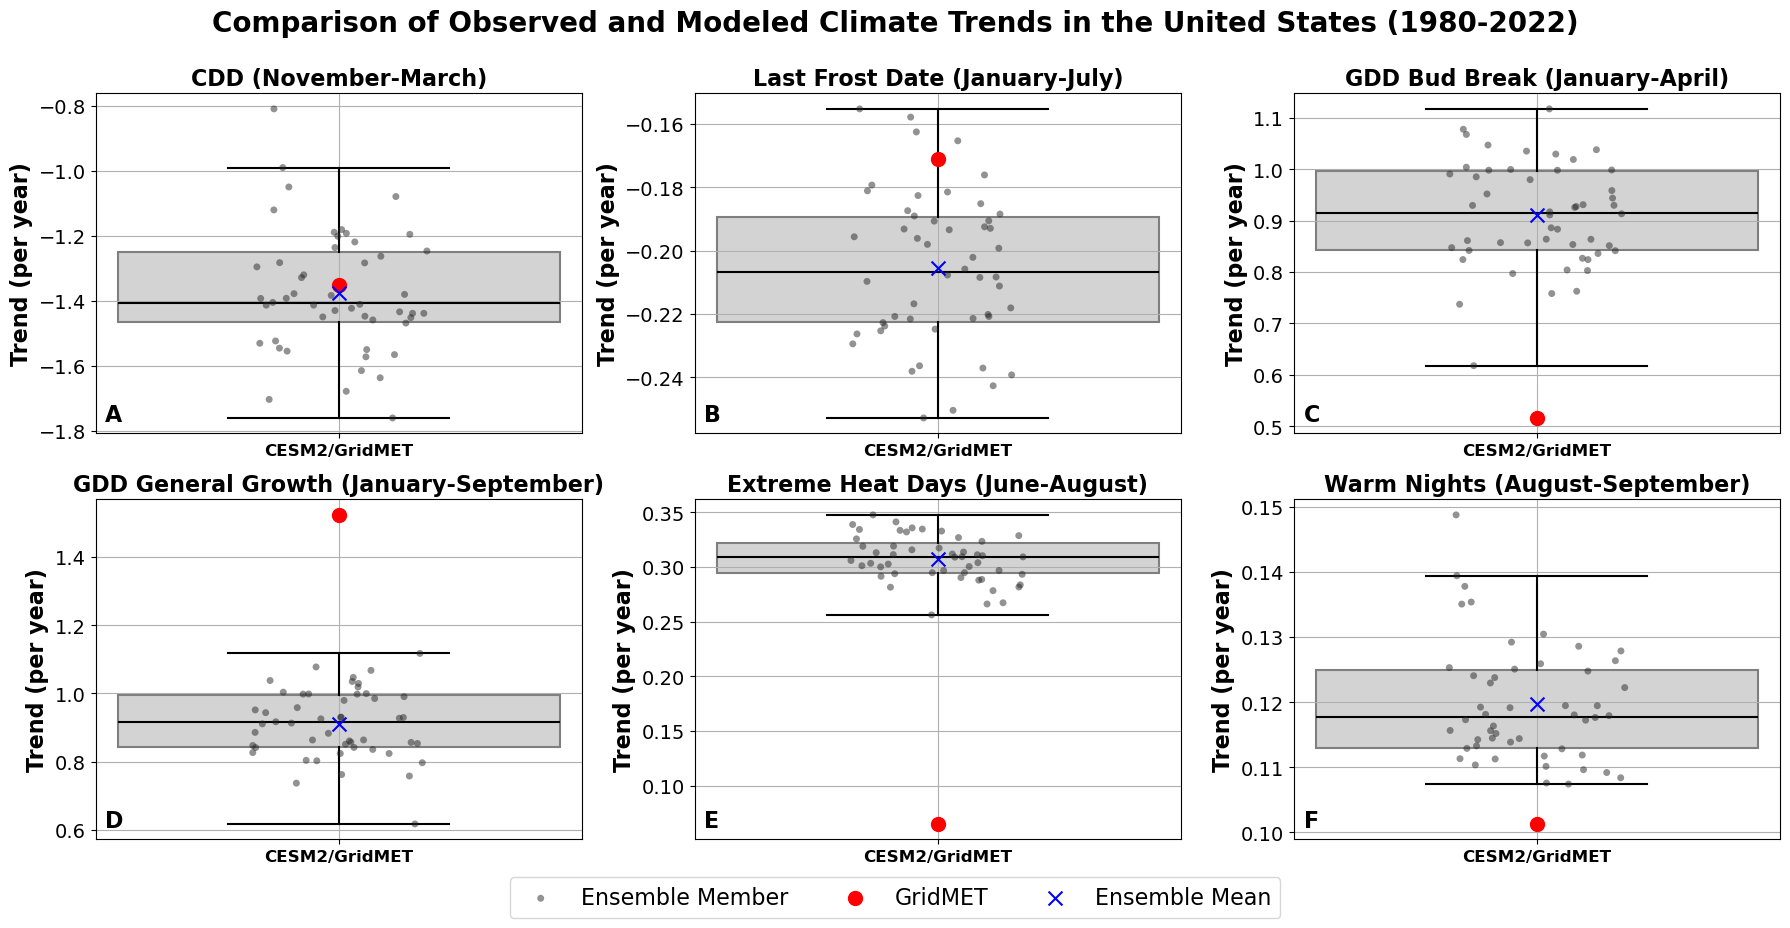

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def plot_trend(ax, cesm2_file, gridmet_file, title, label):
    # Load CESM2 trends
    cesm2_ds = xr.open_dataset(cesm2_file)
    
    # Load GridMET trends
    gridmet_ds = xr.open_dataset(gridmet_file)
    
    # Extract trends for each ensemble member
    ensemble_trends_cesm2_values = cesm2_ds['ensemble_trends'].mean(dim=['lat', 'lon']).values.flatten()
    gridmet_trend_value = gridmet_ds['observed_trends'].mean().item()
    ensemble_mean = ensemble_trends_cesm2_values.mean()
    
    # Prepare data for boxplot
    trend_data = {
        'CESM2 Ensemble': ensemble_trends_cesm2_values
    }
    
    trend_df = pd.DataFrame(trend_data)
    
    # Plot the boxplot
    sns.boxplot(ax=ax, data=trend_df, color='lightgrey', width=0.5, showfliers=False)
    sns.stripplot(ax=ax, data=trend_df, color='grey', alpha=0.5, size=5, label='Ensemble Member')
    
    # Plot the GridMET marker
    ax.scatter(0, gridmet_trend_value, color='red', zorder=5, marker='o', s=100, label='GridMET')
    ax.scatter(0, ensemble_mean, color='blue', zorder=5, marker='x', s=100, label='Ensemble Mean')
    
    # Customize the plot
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_ylabel('Trend (per year)', fontsize=16, weight='bold')
    ax.grid(True)
    
    # Customize tick parameters
    ax.set_xticks([0])
    ax.set_xticklabels(['CESM2/GridMET'], fontsize=12, weight='bold')
    ax.tick_params(axis='y', labelsize=14)  # Enlarge y-axis values
    
    # Improve boxplot aesthetics
    for artist in ax.artists:
        artist.set_edgecolor('black')
        artist.set_facecolor('lightgrey')
    for line in ax.lines:
        line.set_color('black')
        line.set_linewidth(1.5)
    
    # Add subplot label in the bottom left corner
    ax.text(0.02, 0.02, label, fontsize=16, weight='bold', transform=ax.transAxes, ha='left', va='bottom')

# File paths
cdd_cesm2_file = '/home/shawn_preston/daysbelow0ensemble/testtrend_cdd_analysis.nc'
cdd_gridmet_file = '/home/shawn_preston/daysbelow0ensemble/testtestgridmet_trends_cdd_analysis.nc'

last_frost_cesm2_file = '/home/shawn_preston/lastdayfrostensemble/testtesttrend_last_frost_dates_ensemble.nc'
last_frost_gridmet_file = '/home/shawn_preston/lastdayfrostensemble/testtestgridmet_trends_last_frost_analysis.nc'

gdd_jan_apr_cesm2_file = '/home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_bb_analysis.nc'
gdd_jan_apr_gridmet_file = '/home/shawn_preston/gddcesm2janapr/testtestgridmet_trends_gddbb_analysis.nc'

gdd_jan_sept_cesm2_file = '/home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_gg_analysis.nc'
gdd_jan_sept_gridmet_file = '/home/shawn_preston/gddcdesm2jansept/testtestgridmet_trends_gddgg_analysis.nc'

tmax_cesm2_file = '/home/shawn_preston/tmax34ensemble/testtesttrend_days_above_threshold_analysis.nc'
tmax_gridmet_file = '/home/shawn_preston/tmax34ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'

tmin_cesm2_file = '/home/shawn_preston/tmin15ensemble/testtesttrend_days_above_threshold_analysis.nc'
tmin_gridmet_file = '/home/shawn_preston/tmin15ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot each trend with labels
plot_trend(axes[0, 0], cdd_cesm2_file, cdd_gridmet_file, 'CDD (November-March)', 'A')
plot_trend(axes[0, 1], last_frost_cesm2_file, last_frost_gridmet_file, 'Last Frost Date (January-July)', 'B')
plot_trend(axes[0, 2], gdd_jan_apr_cesm2_file, gdd_jan_apr_gridmet_file, 'GDD Bud Break (January-April)', 'C')
plot_trend(axes[1, 0], gdd_jan_sept_cesm2_file, gdd_jan_sept_gridmet_file, 'GDD General Growth (January-September)', 'D')
plot_trend(axes[1, 1], tmax_cesm2_file, tmax_gridmet_file, 'Extreme Heat Days (June-August)', 'E')
plot_trend(axes[1, 2], tmin_cesm2_file, tmin_gridmet_file, 'Warm Nights (August-September)', 'F')

# Add a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=16, title_fontsize=16, loc='lower center', bbox_to_anchor=(0.5, 0.03), ncol=3)

# Add a title for the entire figure
fig.suptitle('Comparison of Observed and Modeled Climate Trends in the United States (1980-2022)', fontsize=20, weight='bold', y=0.95)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
# Save the figure if needed
plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Fig2updated.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


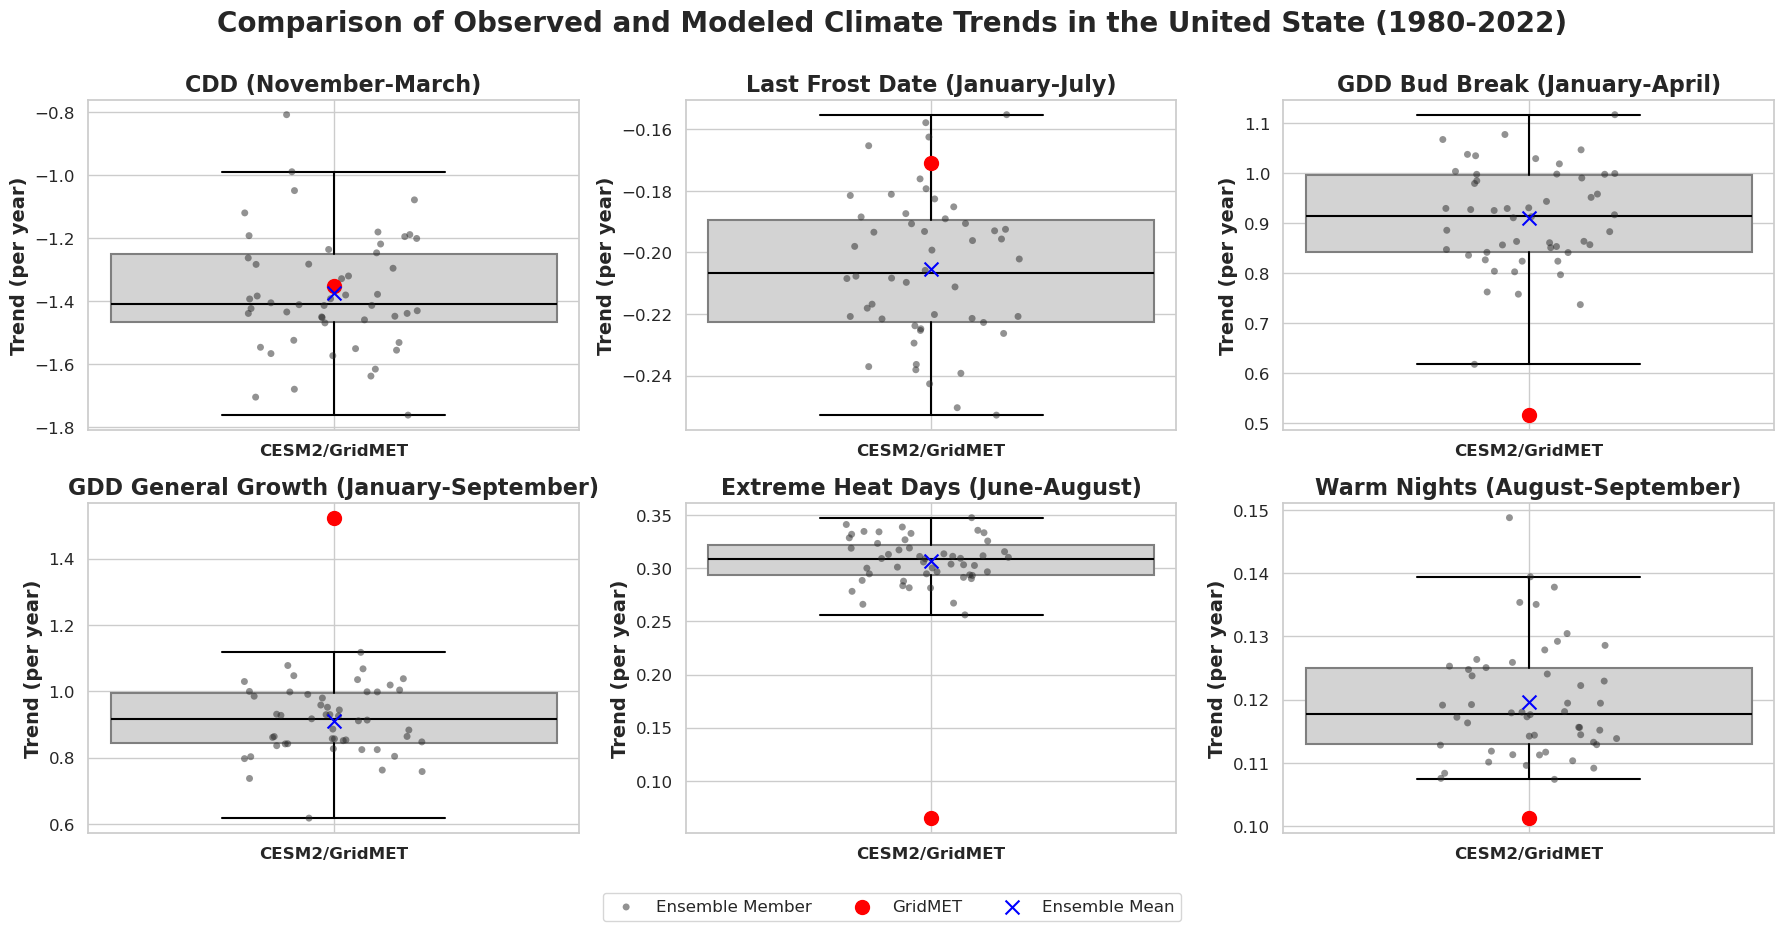

In [29]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def plot_trend(ax, cesm2_file, gridmet_file, title):
    # Load CESM2 trends
    cesm2_ds = xr.open_dataset(cesm2_file)
    
    # Load GridMET trends
    gridmet_ds = xr.open_dataset(gridmet_file)
    
    # Extract trends for each ensemble member
    ensemble_trends_cesm2_values = cesm2_ds['ensemble_trends'].mean(dim=['lat', 'lon']).values.flatten()
    gridmet_trend_value = gridmet_ds['observed_trends'].mean().item()
    ensemble_mean = ensemble_trends_cesm2_values.mean()
    
    # Prepare data for boxplot
    trend_data = {
        'CESM2 Ensemble': ensemble_trends_cesm2_values
    }
    
    trend_df = pd.DataFrame(trend_data)
    
    # Plot the boxplot
    sns.boxplot(ax=ax, data=trend_df, color='lightgrey', width=0.5, showfliers=False)
    sns.stripplot(ax=ax, data=trend_df, color='grey', alpha=0.5, size=5, label='Ensemble Member')
    
    # Plot the GridMET marker
    ax.scatter(0, gridmet_trend_value, color='red', zorder=5, marker='o', s=100, label='GridMET')
    ax.scatter(0, ensemble_mean, color='blue', zorder=5, marker='x', s=100, label='Ensemble Mean')
    
    # Customize the plot
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_ylabel('Trend (per year)', fontsize=14, weight='bold')
    ax.grid(True)
    
    # Customize tick parameters
    ax.set_xticks([0])
    ax.set_xticklabels(['CESM2/GridMET'], fontsize=12, weight='bold')
    ax.tick_params(axis='y', labelsize=12)

    # Improve boxplot aesthetics
    for artist in ax.artists:
        artist.set_edgecolor('black')
        artist.set_facecolor('lightgrey')
    for line in ax.lines:
        line.set_color('black')
        line.set_linewidth(1.5)

# File paths
cdd_cesm2_file = '/home/shawn_preston/daysbelow0ensemble/testtrend_cdd_analysis.nc'
cdd_gridmet_file = '/home/shawn_preston/daysbelow0ensemble/testtestgridmet_trends_cdd_analysis.nc'

last_frost_cesm2_file = '/home/shawn_preston/lastdayfrostensemble/testtesttrend_last_frost_dates_ensemble.nc'
last_frost_gridmet_file = '/home/shawn_preston/lastdayfrostensemble/testtestgridmet_trends_last_frost_analysis.nc'

gdd_jan_apr_cesm2_file = '/home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_bb_analysis.nc'
gdd_jan_apr_gridmet_file = '/home/shawn_preston/gddcesm2janapr/testtestgridmet_trends_gddbb_analysis.nc'

gdd_jan_sept_cesm2_file = '/home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_gg_analysis.nc'
gdd_jan_sept_gridmet_file = '/home/shawn_preston/gddcdesm2jansept/testtestgridmet_trends_gddgg_analysis.nc'

tmax_cesm2_file = '/home/shawn_preston/tmax34ensemble/testtesttrend_days_above_threshold_analysis.nc'
tmax_gridmet_file = '/home/shawn_preston/tmax34ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'

tmin_cesm2_file = '/home/shawn_preston/tmin15ensemble/testtesttrend_days_above_threshold_analysis.nc'
tmin_gridmet_file = '/home/shawn_preston/tmin15ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot each trend
plot_trend(axes[0, 0], cdd_cesm2_file, cdd_gridmet_file, 'CDD (November-March)')
plot_trend(axes[0, 1], last_frost_cesm2_file, last_frost_gridmet_file, 'Last Frost Date (January-July)')
plot_trend(axes[0, 2], gdd_jan_apr_cesm2_file, gdd_jan_apr_gridmet_file, 'GDD Bud Break (January-April)')
plot_trend(axes[1, 0], gdd_jan_sept_cesm2_file, gdd_jan_sept_gridmet_file, 'GDD General Growth (January-September)')
plot_trend(axes[1, 1], tmax_cesm2_file, tmax_gridmet_file, 'Extreme Heat Days (June-August)')
plot_trend(axes[1, 2], tmin_cesm2_file, tmin_gridmet_file, 'Warm Nights (August-September)')

# Add a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=12, title_fontsize=14, loc='lower center', bbox_to_anchor=(0.5, 0.03), ncol=3)

# Add a title for the entire figure
fig.suptitle('Comparison of Observed and Modeled Climate Trends in the United State (1980-2022)', fontsize=20, weight='bold', y=0.95)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
# Save the figure if needed
plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Fig2updated.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


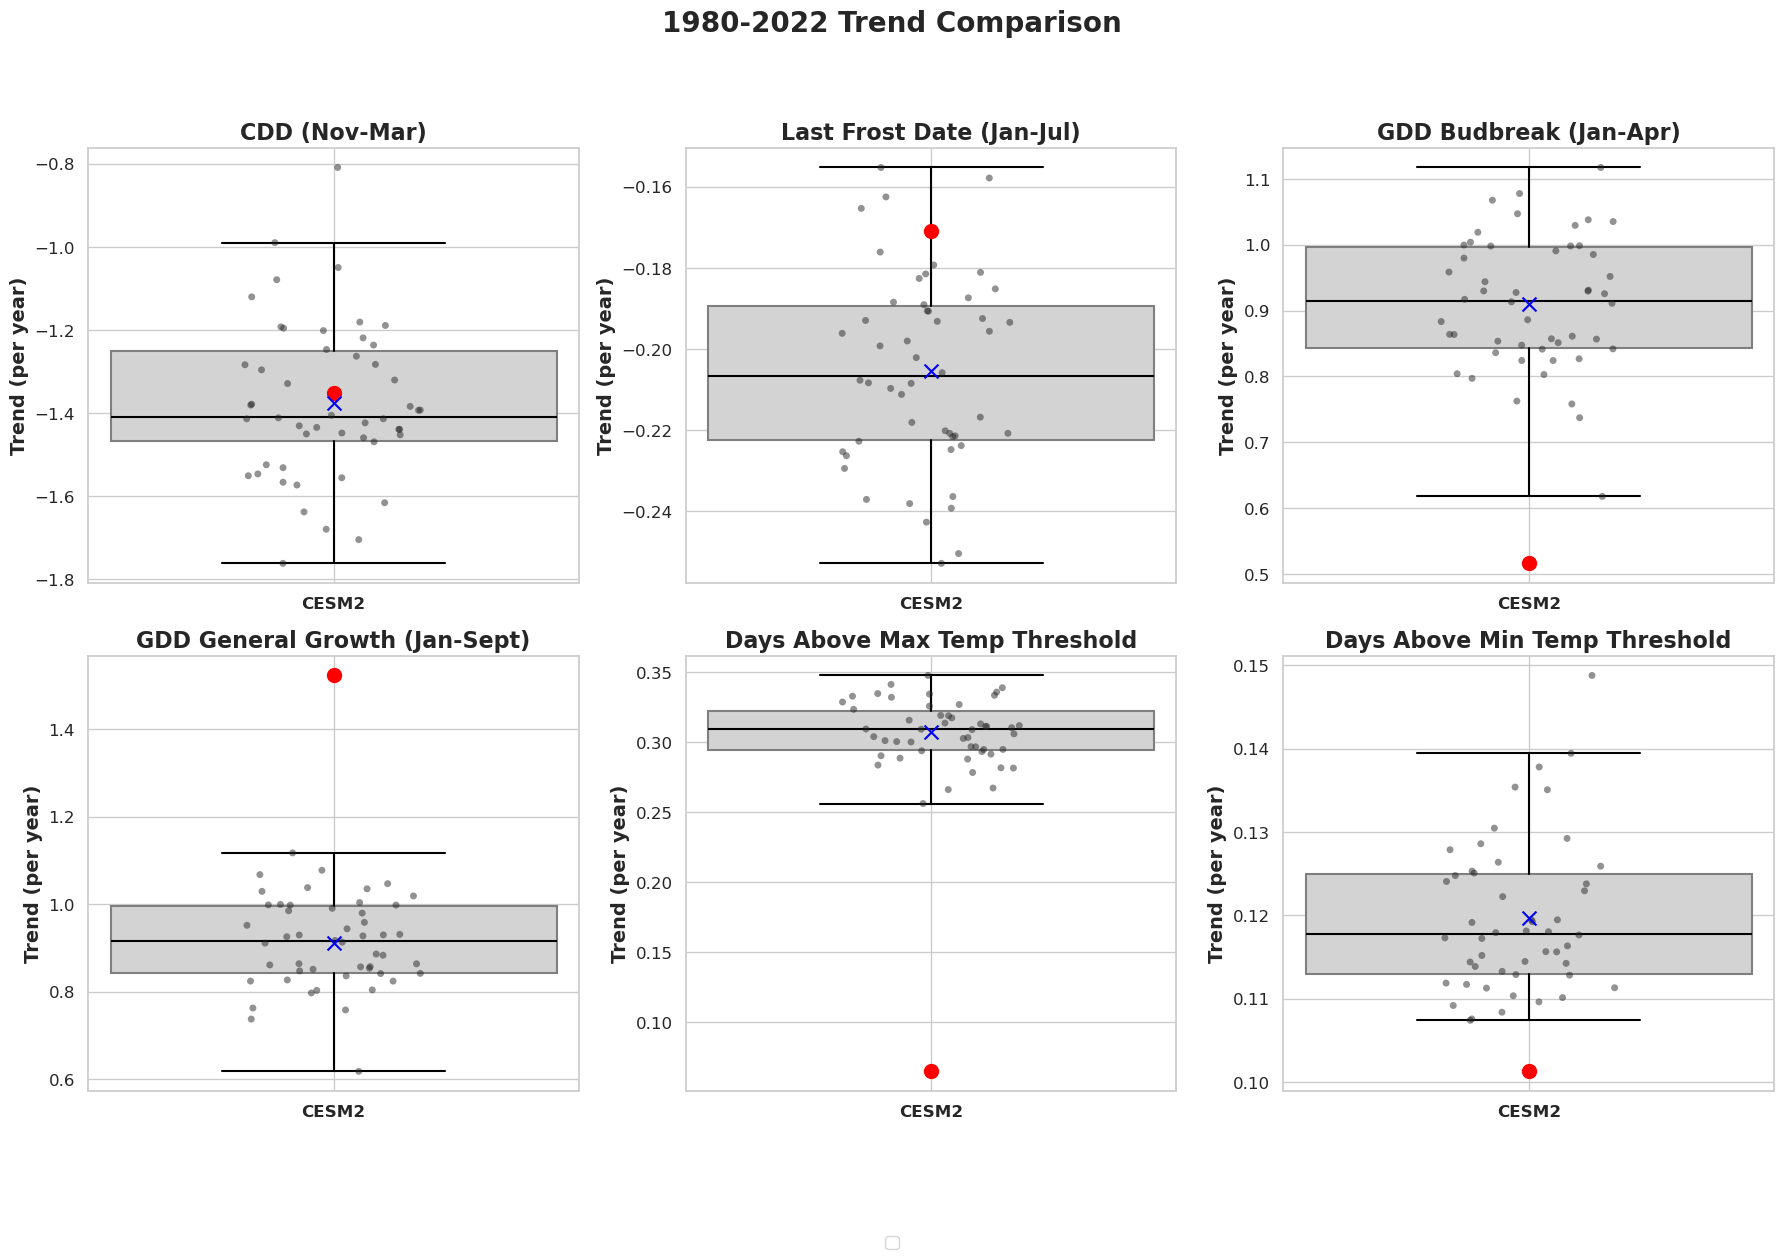

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def plot_trend(ax, cesm2_file, gridmet_file, title):
    # Load CESM2 trends
    cesm2_ds = xr.open_dataset(cesm2_file)
    
    # Load GridMET trends
    gridmet_ds = xr.open_dataset(gridmet_file)
    
    # Load the shapefile
    gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')
    
    # Apply the shapefile mask to CESM2 and GridMET
    lon_cesm2 = cesm2_ds.lon.values
    lat_cesm2 = cesm2_ds.lat.values
    mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
    ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)
    
    lon_gridmet = gridmet_ds.lon.values
    lat_gridmet = gridmet_ds.lat.values
    mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
    gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)
    
    # Extract trends for each ensemble member
    ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
    gridmet_trend_value = gridmet_trend_masked.mean().item()
    ensemble_mean = ensemble_trends_cesm2_values.mean()
    
    # Prepare data for boxplot
    trend_data = {
        'CESM2 Ensemble': ensemble_trends_cesm2_values
    }
    
    trend_df = pd.DataFrame(trend_data)
    
    # Plot the boxplot
    sns.boxplot(ax=ax, data=trend_df, color='lightgrey', width=0.5, showfliers=False)
    sns.stripplot(ax=ax, data=trend_df, color='grey', alpha=0.5, size=5)
    
    # Plot the GridMET marker
    ax.scatter(0, gridmet_trend_value, color='red', zorder=5, marker='o', s=100)
    ax.scatter(0, ensemble_mean, color='blue', zorder=5, marker='x', s=100)
    
    # Customize the plot
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_ylabel('Trend (per year)', fontsize=14, weight='bold')
    ax.grid(True)
    
    # Customize tick parameters
    ax.set_xticks([0])
    ax.set_xticklabels(['CESM2'], fontsize=12, weight='bold')
    ax.tick_params(axis='y', labelsize=12)

    # Improve boxplot aesthetics
    for artist in ax.artists:
        artist.set_edgecolor('black')
        artist.set_facecolor('lightgrey')
    for line in ax.lines:
        line.set_color('black')
        line.set_linewidth(1.5)

# File paths
cdd_cesm2_file = '/home/shawn_preston/daysbelow0ensemble/testtrend_cdd_analysis.nc'
cdd_gridmet_file = '/home/shawn_preston/daysbelow0ensemble/testtestgridmet_trends_cdd_analysis.nc'

last_frost_cesm2_file = '/home/shawn_preston/lastdayfrostensemble/testtesttrend_last_frost_dates_ensemble.nc'
last_frost_gridmet_file = '/home/shawn_preston/lastdayfrostensemble/testtestgridmet_trends_last_frost_analysis.nc'

gdd_jan_apr_cesm2_file = '/home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_bb_analysis.nc'
gdd_jan_apr_gridmet_file = '/home/shawn_preston/gddcesm2janapr/testtestgridmet_trends_gddbb_analysis.nc'

gdd_jan_sept_cesm2_file = '/home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_gg_analysis.nc'
gdd_jan_sept_gridmet_file = '/home/shawn_preston/gddcdesm2jansept/testtestgridmet_trends_gddgg_analysis.nc'

tmax_cesm2_file = '/home/shawn_preston/tmax34ensemble/testtesttrend_days_above_threshold_analysis.nc'
tmax_gridmet_file = '/home/shawn_preston/tmax34ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'

tmin_cesm2_file = '/home/shawn_preston/tmin15ensemble/testtesttrend_days_above_threshold_analysis.nc'
tmin_gridmet_file = '/home/shawn_preston/tmin15ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot each trend
plot_trend(axes[0, 0], cdd_cesm2_file, cdd_gridmet_file, 'CDD (Nov-Mar)')
plot_trend(axes[0, 1], last_frost_cesm2_file, last_frost_gridmet_file, 'Last Frost Date (Jan-Jul)')
plot_trend(axes[0, 2], gdd_jan_apr_cesm2_file, gdd_jan_apr_gridmet_file, 'GDD Budbreak (Jan-Apr)')
plot_trend(axes[1, 0], gdd_jan_sept_cesm2_file, gdd_jan_sept_gridmet_file, 'GDD General Growth (Jan-Sept)')
plot_trend(axes[1, 1], tmax_cesm2_file, tmax_gridmet_file, 'Days Above Max Temp Threshold')
plot_trend(axes[1, 2], tmin_cesm2_file, tmin_gridmet_file, 'Days Above Min Temp Threshold')

# Add a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=12, title_fontsize=14, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Add a title for the entire figure
fig.suptitle('1980-2022 Trend Comparison', fontsize=20, weight='bold', y = .99)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
#plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/3x2_trends_plot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


# FIG 2

# CDD

Saved the results to /home/shawn_preston/daysbelow0ensemble/testtrend_cdd_analysis.nc


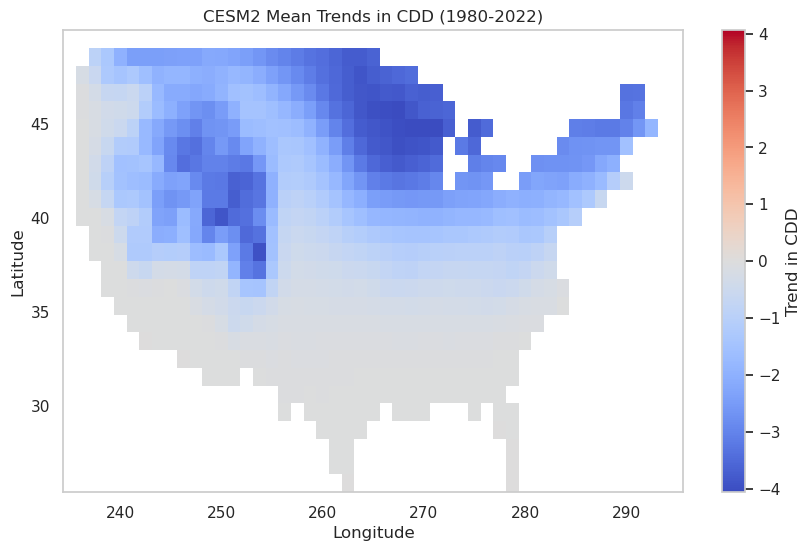

In [27]:
import xarray as xr
import numpy as np
import glob
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def filter_months(data, start_month=11, end_month=3):
    """Filter data to include only the specified months."""
    months = list(range(start_month, 13)) + list(range(1, end_month + 1)) if start_month > end_month else list(range(start_month, end_month + 1))
    return data.sel(time=data['time.month'].isin(months))

def calculate_cdd(data, baseline=0):
    """Calculate Cold Degree Days (CDD) with a baseline of 0°C."""
    cdd = xr.apply_ufunc(
        lambda x: np.where(x < baseline, baseline - x, 0),
        data,
        dask="allowed"
    )
    return cdd.cumsum(dim="time")  # Accumulation of CDD over time

def calculate_individual_trends(annual_cdd):
    """Calculate linear trends for each ensemble member."""
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_cdd:
        years = member_data['time.year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):  # Ensure there's at least some data
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_ts_concatenated/*.nc'))
ensemble_cdd = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmin_celsius = ds['TREFHT'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmin_celsius_masked = tmin_celsius.where(mask == 0)
    
    # Filter months and calculate CDD
    filtered_data = filter_months(tmin_celsius_masked, start_month=11, end_month=3)
    annual_cdd = filtered_data.groupby('time.year').apply(calculate_cdd)
    
    # Multiply by the normalized areas
    annual_cdd_weighted = annual_cdd * normalized_areas
    
    ensemble_cdd.append(annual_cdd_weighted)

# Combine all ensemble members into a single DataArray
ensemble_annual_cdd = xr.concat(ensemble_cdd, dim='ensemble')

# Calculate trends
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_annual_cdd)

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Compile into a Dataset
cesm2_cdd_ds = xr.Dataset({
    "ensemble_cdd_yearly": ensemble_annual_cdd,
    "ensemble_trends": ensemble_trends_da,
    "ensemble_p_values": ensemble_p_values_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/daysbelow0ensemble/testtrend_cdd_analysis.nc'
cesm2_cdd_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in CDD'})
plt.title('CESM2 Mean Trends in CDD (1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Saved the results to /home/shawn_preston/daysbelow0ensemble/testtestgridmet_trends_cdd_analysis.nc


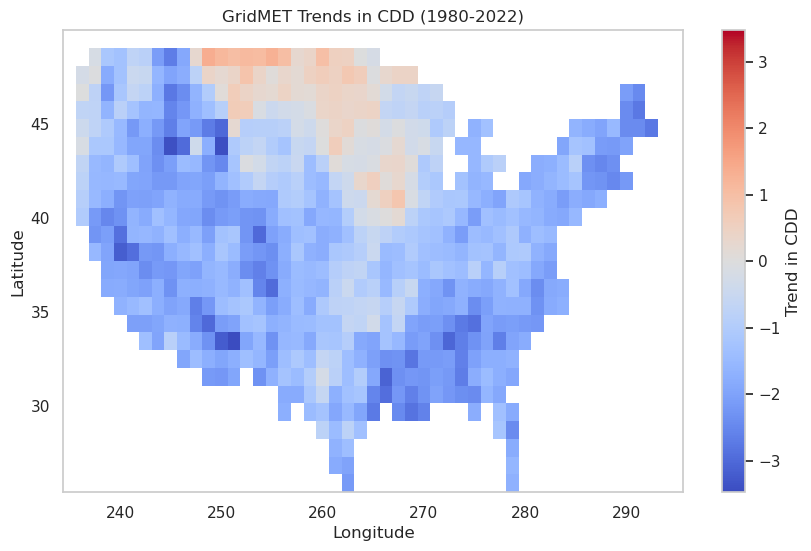

In [30]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def filter_months(data, start_month=11, end_month=3):
    """Filter data to include only the specified months."""
    months = list(range(start_month, 13)) + list(range(1, end_month + 1)) if start_month > end_month else list(range(start_month, end_month + 1))
    return data.sel(time=data['time.month'].isin(months))

def calculate_cdd(data, baseline=0):
    """Calculate Cold Degree Days (CDD) with a baseline of 0°C."""
    cdd = xr.apply_ufunc(
        lambda x: np.where(x < baseline, baseline - x, 0),
        data,
        dask="allowed"
    )
    return cdd.cumsum(dim="time")  # Accumulation of CDD over time

def calculate_individual_trends(annual_cdd):
    """Calculate linear trends for CDD."""
    years = annual_cdd['time.year'].values
    lat, lon = annual_cdd.lat.values, annual_cdd.lon.values
    slopes = np.full((len(lat), len(lon)), np.nan)
    p_values = np.full((len(lat), len(lon)), np.nan)

    for i in range(len(lat)):
        for j in range(len(lon)):
            y = annual_cdd.isel(lat=i, lon=j).values
            if not np.all(np.isnan(y)):  # Ensure there's at least some data
                slope, intercept, r_value, p_value, std_err = linregress(years, y)
                slopes[i, j] = slope
                p_values[i, j] = p_value

    trend_da = xr.DataArray(data=slopes, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})
    p_values_da = xr.DataArray(data=p_values, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})

    return trend_da, p_values_da

# Load the GridMET dataset
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax/modified_regridded1979_2022_tavg_gridmet.nc').sel(time=slice('1980-01-01', '2022-12-31'))
tavg_celsius_gridmet = gridmet_ds['tavg'] - 273.15  # Convert from K to C if necessary

# Extract the longitude and latitude arrays from GridMET
lon_1d_gridmet = gridmet_ds['lon'].values
lat_1d_gridmet = gridmet_ds['lat'].values

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Create the mask using the shapefile
mask_gridmet = regionmask.mask_geopandas(gdf, lon_1d_gridmet, lat_1d_gridmet)

# Apply the mask to GridMET data
tavg_celsius_gridmet_masked = tavg_celsius_gridmet.where(mask_gridmet == 0)

# Filter months and calculate CDD
filtered_data_gridmet = filter_months(tavg_celsius_gridmet_masked, start_month=11, end_month=3)
annual_cdd_gridmet = filtered_data_gridmet.groupby('time.year').apply(calculate_cdd)

# Multiply by the normalized areas
annual_cdd_gridmet_weighted = annual_cdd_gridmet * normalized_areas

# Calculate the trend for GridMET
gridmet_trend_da, gridmet_p_values_da = calculate_individual_trends(annual_cdd_gridmet_weighted)

# Mask the trends dataset to ensure values outside the shapefile are NaN
gridmet_trend_da = gridmet_trend_da.where(mask_gridmet == 0)

# Save the GridMET trends to a NetCDF file
gridmet_cdd_ds = xr.Dataset({
    "observed_trends": gridmet_trend_da,
    "observed_p_values": gridmet_p_values_da
}, coords={"lat": gridmet_trend_da.lat, "lon": gridmet_trend_da.lon})

output_nc_file_gridmet = '/home/shawn_preston/daysbelow0ensemble/testtestgridmet_trends_cdd_analysis.nc'
gridmet_cdd_ds.to_netcdf(output_nc_file_gridmet)

print(f"Saved the results to {output_nc_file_gridmet}")

# Visualize the trends
plt.figure(figsize=(10, 6))
gridmet_trend_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in CDD'})
plt.title('GridMET Trends in CDD (1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


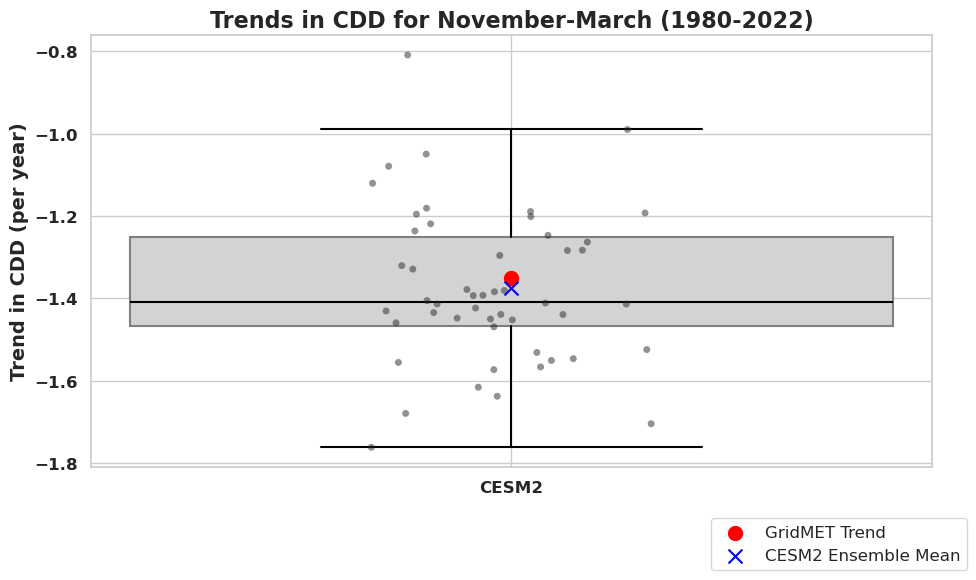

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/daysbelow0ensemble/testtrend_cdd_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/daysbelow0ensemble/testtestgridmet_trends_cdd_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in CDD for November-March (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in CDD (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Days_Below_0C_Trends_Nov_Mar_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


# LAST DAY OF FROST

Saved the results to /home/shawn_preston/lastdayfrostensemble/testtesttrend_last_frost_dates_ensemble.nc


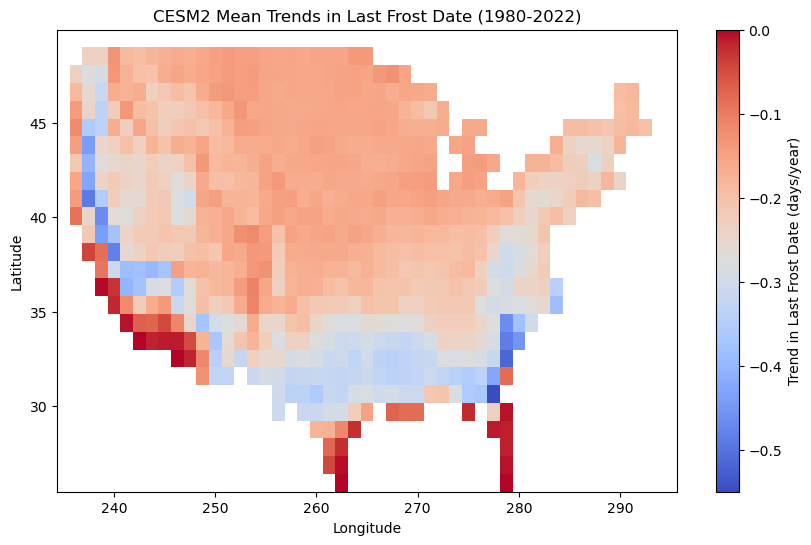

In [1]:
import xarray as xr
import numpy as np
import glob
import cftime
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def filter_months(data, start_month=1, end_month=7):
    """Filter data to include only the specified months."""
    return data.sel(time=data['time.month'].isin(range(start_month, end_month + 1)))

def calculate_last_frost_date(data):
    """Calculate the last frost day of the year for each year."""
    frost_days = (data - 273.15) <= 0
    frost_day_of_year = frost_days.where(frost_days, other=0) * data['time'].dt.dayofyear
    last_frost_day_of_year = frost_day_of_year.groupby('time.year').max('time')
    return last_frost_day_of_year

def calculate_individual_trends(last_frost_dates):
    """Calculate linear trends for each ensemble member."""
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in last_frost_dates:
        years = member_data['year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):  # Ensure there's at least some data
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    # Calculate the mean trends and p-values across all ensembles
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to the .nc files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_tmin_concatenated/*.nc'))
ensemble_last_frost_dates = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    filtered_data = filter_months(ds['TREFHTMN'])
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    filtered_data_masked = filtered_data.where(mask == 0)
    
    # Calculate last frost dates
    last_frost_dates = calculate_last_frost_date(filtered_data_masked)
    
    # Multiply by the normalized areas
    last_frost_dates_weighted = last_frost_dates * normalized_areas
    
    ensemble_last_frost_dates.append(last_frost_dates_weighted)

ensemble_last_frost_dates_da = xr.concat(ensemble_last_frost_dates, dim='ensemble')
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_last_frost_dates_da)

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Compile into a Dataset
last_frost_trends_ds = xr.Dataset({
    "ensemble_last_frost_dates_yearly": ensemble_last_frost_dates_da,
    "ensemble_trends": ensemble_trends_da,
    "ensemble_p_values": ensemble_p_values_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/lastdayfrostensemble/testtesttrend_last_frost_dates_ensemble.nc'
last_frost_trends_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in Last Frost Date (days/year)'})
plt.title('CESM2 Mean Trends in Last Frost Date (1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<xarray.DataArray (year: 43, lat: 192, lon: 288)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan,

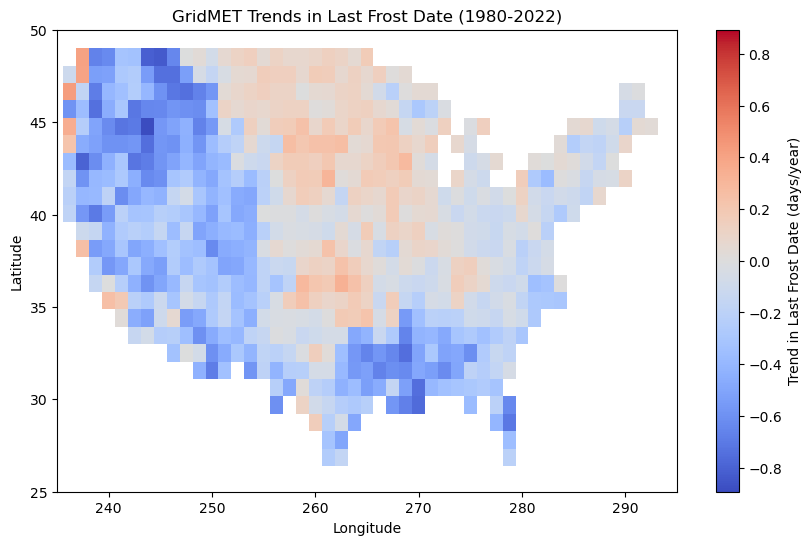

In [5]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def filter_months(data, start_month=1, end_month=7):
    """Filter data to include only the specified months."""
    return data.sel(time=data['time.month'].isin(range(start_month, end_month + 1)))

def calculate_last_frost_date(data, is_kelvin=True):
    """Calculate the last frost day of the year for each year."""
    if is_kelvin:
        data = data - 273.15  # Convert from Kelvin to Celsius if needed
    frost_days = data <= 0
    frost_day_of_year = frost_days.where(frost_days, other=0) * data['time'].dt.dayofyear
    last_frost_day_of_year = frost_day_of_year.groupby('time.year').max('time')
    return last_frost_day_of_year

def calculate_individual_trends(last_frost_dates):
    """Calculate linear trends for each ensemble member."""
    lat, lon = last_frost_dates.lat.values, last_frost_dates.lon.values
    years = last_frost_dates['year'].values
    slopes = np.full((len(lat), len(lon)), np.nan)
    p_values = np.full((len(lat), len(lon)), np.nan)

    for i in range(len(lat)):
        for j in range(len(lon)):
            y = last_frost_dates.isel(lat=i, lon=j).values
            if not np.all(np.isnan(y)):  # Ensure there's at least some data
                slope, intercept, r_value, p_value, std_err = linregress(years, y)
                slopes[i, j] = slope
                p_values[i, j] = p_value

    trends_da = xr.DataArray(data=slopes, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})
    p_values_da = xr.DataArray(data=p_values, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})

    return trends_da, p_values_da

# Load the GridMET dataset
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax/modified_regridded1979_2022_tmin_gridmet.nc').sel(time=slice('1980-01-01', '2022-12-31'))
tmin_gridmet = gridmet_ds['tmin']

# Check if the data is in Kelvin or Celsius
is_kelvin = tmin_gridmet.max() > 200  # Simple check: if max temperature is greater than 200, it's likely in Kelvin

# Extract the longitude and latitude arrays from GridMET
lon_1d_gridmet = gridmet_ds['lon'].values
lat_1d_gridmet = gridmet_ds['lat'].values

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Create the mask using the shapefile
mask_gridmet = regionmask.mask_geopandas(gdf, lon_1d_gridmet, lat_1d_gridmet)

# Apply the mask to GridMET data
tmin_gridmet_masked = tmin_gridmet.where(mask_gridmet == 0)

# Filter months and calculate last frost dates
filtered_data_gridmet = filter_months(tmin_gridmet_masked, start_month=1, end_month=7)
annual_last_frost_dates_gridmet = calculate_last_frost_date(filtered_data_gridmet, is_kelvin=is_kelvin)

# Ensure the normalized_areas array matches the shape of the annual_last_frost_dates_gridmet
normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

# Resample normalized_areas to match the grid resolution of annual_last_frost_dates_gridmet
normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d_gridmet, lon=lon_1d_gridmet)

annual_last_frost_dates_gridmet_weighted = annual_last_frost_dates_gridmet * normalized_areas_da_resampled

# Print information about the DataArray to debug
print(annual_last_frost_dates_gridmet_weighted)
print(annual_last_frost_dates_gridmet_weighted.values)

# Calculate the trend for GridMET
gridmet_trend_da, gridmet_p_values_da = calculate_individual_trends(annual_last_frost_dates_gridmet_weighted)

# Mask the trends dataset to ensure values outside the shapefile are NaN
gridmet_trend_da = gridmet_trend_da.where(mask_gridmet == 0)

# Save the GridMET trends to a NetCDF file
gridmet_last_frost_ds = xr.Dataset({
    "observed_trends": gridmet_trend_da,
    "observed_p_values": gridmet_p_values_da
}, coords={"lat": gridmet_trend_da.lat, "lon": gridmet_trend_da.lon})

output_nc_file_gridmet = '/home/shawn_preston/lastdayfrostensemble/testtestgridmet_trends_last_frost_analysis.nc'
gridmet_last_frost_ds.to_netcdf(output_nc_file_gridmet)

print(f"Saved the results to {output_nc_file_gridmet}")

# Visualize the trends
plt.figure(figsize=(10, 6))
gridmet_trend_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in Last Frost Date (days/year)'})
plt.title('GridMET Trends in Last Frost Date (1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([235, 295])
plt.ylim([25, 50])
plt.show()


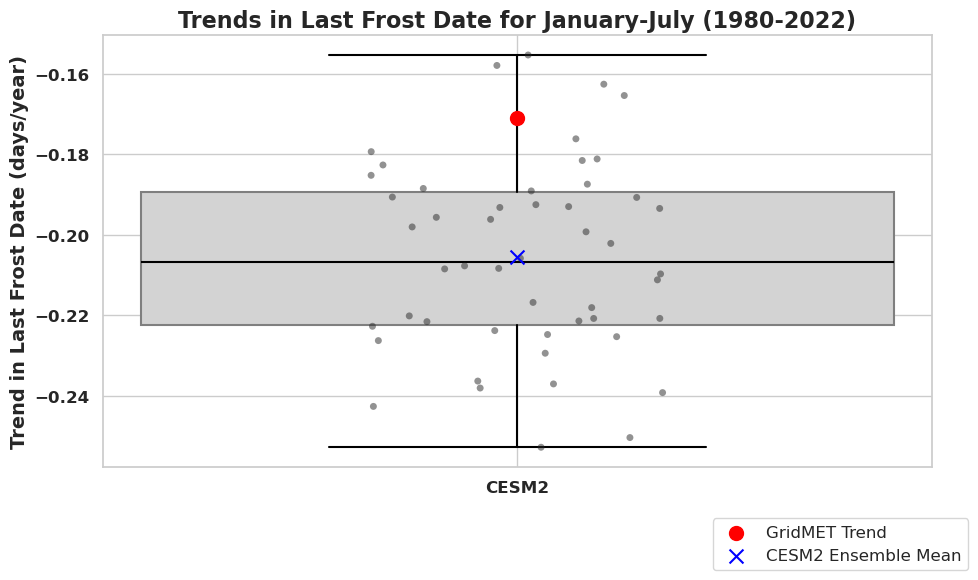

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/lastdayfrostensemble/testtesttrend_last_frost_dates_ensemble.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/lastdayfrostensemble/testtestgridmet_trends_last_frost_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in Last Frost Date for January-July (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in Last Frost Date (days/year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Last_Frost_Date_Trends_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


# GDD BUD BREAK

Saved the results to /home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_bb_analysis.nc


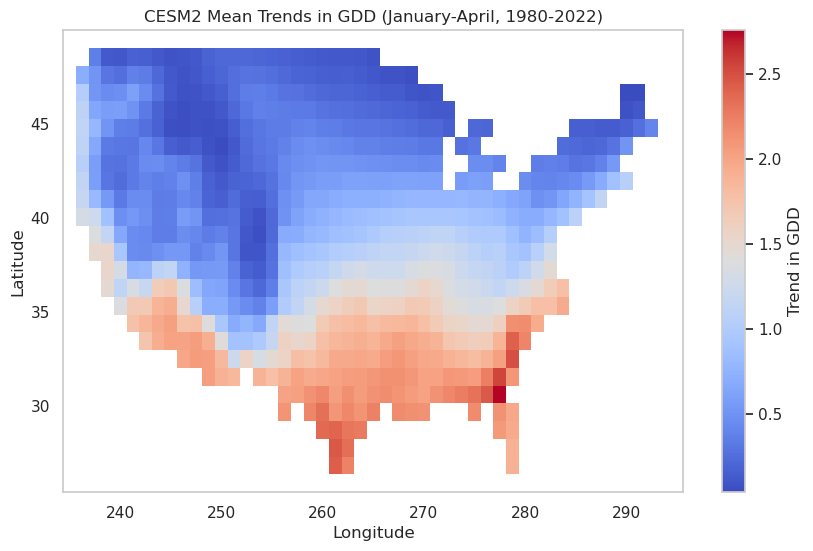

In [12]:
import xarray as xr
import numpy as np
import glob
import geopandas as gpd
import regionmask
from scipy.stats import linregress
import matplotlib.pyplot as plt

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.cumsum(dim="time")  # Accumulation of GDD over time

def filter_months(data, start_month=1, end_month=4):
    """Filter data to include only the months from January to April."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for each ensemble member."""
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_gdd:
        years = member_data['time.year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_ts_concatenated/*.nc'))
ensemble_gdd = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmin_celsius = ds['TREFHT'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmin_celsius_masked = tmin_celsius.where(mask == 0)
    
    # Filter months and calculate GDD
    filtered_data = filter_months(tmin_celsius_masked, start_month=1, end_month=4)
    annual_gdd = filtered_data.groupby('time.year').apply(calculate_gdd)
    
    # Ensure the normalized_areas array matches the shape of the annual_gdd
    normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

    # Resample normalized_areas to match the grid resolution of annual_gdd
    normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

    # Multiply by the normalized areas
    annual_gdd_weighted = annual_gdd * normalized_areas_da_resampled
    
    ensemble_gdd.append(annual_gdd_weighted)

ensemble_annual_gdd = xr.concat(ensemble_gdd, dim='ensemble')
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_annual_gdd)

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Save only the trends data to reduce file size
cesm2_gdd_ds = xr.Dataset({
    "ensemble_trends": ensemble_trends_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_bb_analysis.nc'
cesm2_gdd_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('CESM2 Mean Trends in GDD (January-April, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Saved the observed GDD trends to /home/shawn_preston/gddcesm2janapr/testtestgridmet_trends_gddbb_analysis.nc


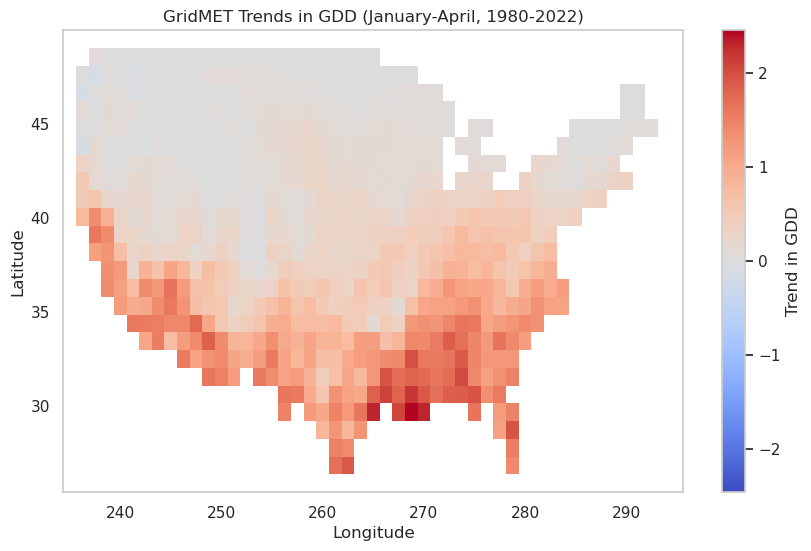

In [15]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.cumsum(dim="time")

def filter_months(data, start_month=1, end_month=4):
    """Filter data to include only the months from January to April."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for GDD."""
    years = annual_gdd['time.year'].values
    lat, lon = annual_gdd.lat.values, annual_gdd.lon.values
    slopes = np.full((len(lat), len(lon)), np.nan)
    p_values = np.full((len(lat), len(lon)), np.nan)

    for i in range(len(lat)):
        for j in range(len(lon)):
            y = annual_gdd.isel(lat=i, lon=j).values
            if not np.all(np.isnan(y)):
                slope, intercept, r_value, p_value, std_err = linregress(years, y)
                slopes[i, j] = slope
                p_values[i, j] = p_value

    trend_da = xr.DataArray(data=slopes, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})
    p_values_da = xr.DataArray(data=p_values, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})

    return trend_da, p_values_da

# Load observed temperature data
observed_data_path = '/home/shawn_preston/tmax/modified_regridded1979_2022_tavg_gridmet.nc'
observed_data = xr.open_dataset(observed_data_path)
observed_temp_data = observed_data['tavg']  # Ensure this is the correct variable name

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')
lon_1d = observed_data['lon'].values
lat_1d = observed_data['lat'].values

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to the temperature data
observed_temp_data_masked = observed_temp_data.where(mask == 0)

# Calculate GDD for observed data
filtered_data = filter_months(observed_temp_data_masked, start_month=1, end_month=4)
annual_gdd = filtered_data.groupby('time.year').apply(calculate_gdd)

# Ensure the normalized_areas array matches the shape of the annual_gdd
normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

# Resample normalized_areas to match the grid resolution of annual_gdd
normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

# Multiply by the normalized areas
annual_gdd_weighted = annual_gdd * normalized_areas_da_resampled

# Calculate trends for observed GDD data
observed_trends_da, observed_p_values_da = calculate_individual_trends(annual_gdd_weighted)

# Set values outside the mask to NaN
observed_trends_da = observed_trends_da.where(mask == 0)

# Compile into a Dataset
observed_trends_ds = xr.Dataset({
    "observed_trends": observed_trends_da,
    "observed_p_values": observed_p_values_da
}, coords={"lat": observed_data.lat, "lon": observed_data.lon})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcesm2janapr/testtestgridmet_trends_gddbb_analysis.nc'
observed_trends_ds.to_netcdf(output_nc_file)

print(f"Saved the observed GDD trends to {output_nc_file}")

# Visualize the trends
plt.figure(figsize=(10, 6))
observed_trends_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('GridMET Trends in GDD (January-April, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


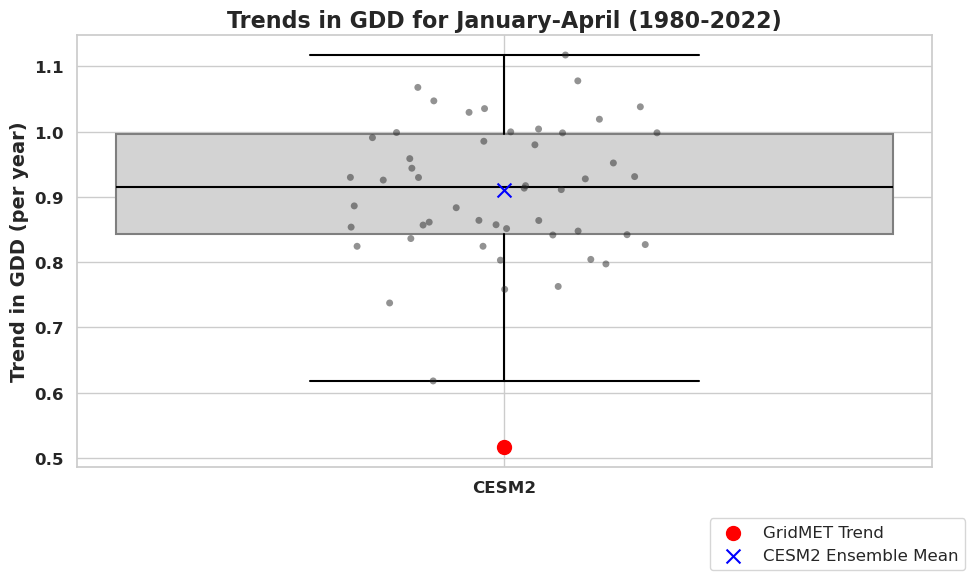

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_bb_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/gddcesm2janapr/testtestgridmet_trends_gddbb_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in GDD for January-April (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in GDD (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/GDD_Trends_Jan_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


Saved the results to /home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_analysis.nc


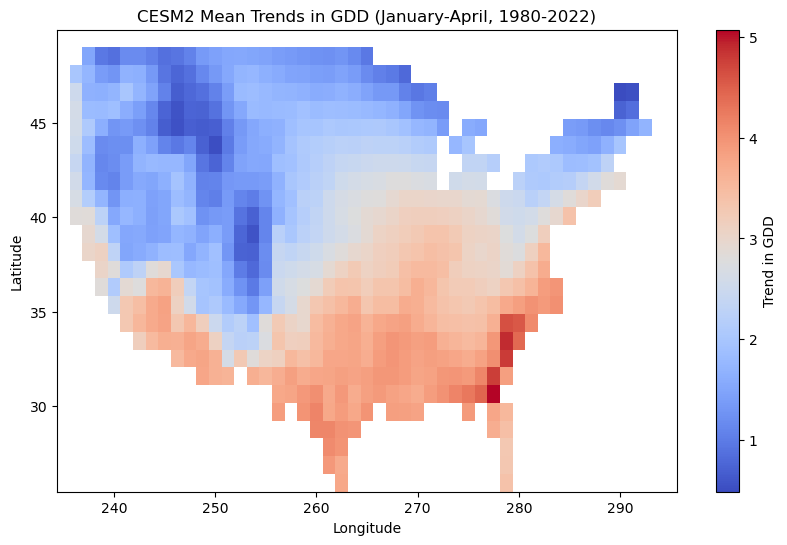

In [1]:
import xarray as xr
import numpy as np
import glob
import geopandas as gpd
import regionmask
from scipy.stats import linregress
import matplotlib.pyplot as plt

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.sum(dim="time")

def filter_months(data, start_month=1, end_month=4):
    """Filter data to include only the months from January to April."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for each ensemble member."""
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_gdd:
        years = member_data['year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_ts_concatenated/*.nc'))
ensemble_gdd = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmin_celsius = ds['TREFHT'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmin_celsius_masked = tmin_celsius.where(mask == 0)
    
    # Filter months and calculate GDD
    filtered_data = filter_months(tmin_celsius_masked, start_month=1, end_month=4)
    annual_gdd = filtered_data.groupby('time.year').apply(calculate_gdd)
    
    ensemble_gdd.append(annual_gdd)

ensemble_annual_gdd = xr.concat(ensemble_gdd, dim='ensemble')
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_annual_gdd)

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Compile into a Dataset
cesm2_gdd_ds = xr.Dataset({
    "ensemble_gdd_yearly": ensemble_annual_gdd,
    "ensemble_trends": ensemble_trends_da,
    "ensemble_p_values": ensemble_p_values_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_analysis.nc'
cesm2_gdd_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('CESM2 Mean Trends in GDD (January-April, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Saved the observed GDD trends to /home/shawn_preston/gddcesm2janapr/testgridmet_trends_gddbb_analysis.nc


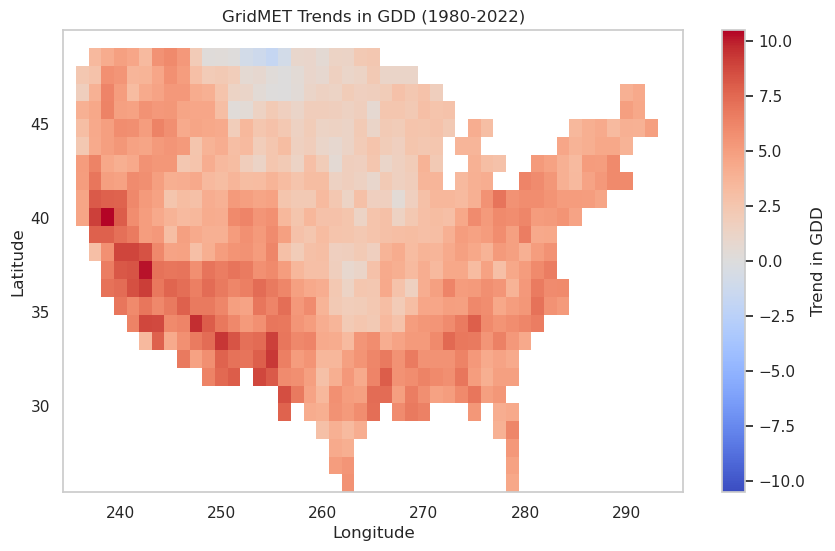

In [24]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.sum(dim="time")

def filter_months(data, start_month=1, end_month=4):
    """Filter data to include only the months from January to April."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for GDD."""
    years = annual_gdd['year'].values
    lat, lon = annual_gdd.lat.values, annual_gdd.lon.values
    slopes = np.full((len(lat), len(lon)), np.nan)
    p_values = np.full((len(lat), len(lon)), np.nan)

    for i in range(len(lat)):
        for j in range(len(lon)):
            y = annual_gdd.isel(lat=i, lon=j).values
            if not np.all(np.isnan(y)):
                slope, intercept, r_value, p_value, std_err = linregress(years, y)
                slopes[i, j] = slope
                p_values[i, j] = p_value

    trend_da = xr.DataArray(data=slopes, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})
    p_values_da = xr.DataArray(data=p_values, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})

    return trend_da, p_values_da

# Load observed temperature data
observed_data_path = '/home/shawn_preston/tmax/modified_regridded1979_2022_tavg_gridmet.nc'
observed_data = xr.open_dataset(observed_data_path)
observed_temp_data = observed_data['tavg']  # Ensure this is the correct variable name

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')
lon_1d = observed_data['lon'].values
lat_1d = observed_data['lat'].values

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to the temperature data
observed_temp_data_masked = observed_temp_data.where(mask == 0)

# Calculate GDD for observed data
observed_gdd = filter_months_and_calculate_gdd(observed_temp_data_masked)

# Calculate trends for observed GDD data
observed_trends_da, observed_p_values_da = calculate_individual_trends(observed_gdd)

# Set values outside the mask to NaN
observed_trends_da = observed_trends_da.where(mask == 0)

# Compile into a Dataset
observed_trends_ds = xr.Dataset({
    "observed_gdd_yearly": observed_gdd,
    "observed_trends": observed_trends_da,
    "observed_p_values": observed_p_values_da
}, coords={"lat": observed_data.lat, "lon": observed_data.lon})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcesm2janapr/testgridmet_trends_gddbb_analysis.nc'
observed_trends_ds.to_netcdf(output_nc_file)

print(f"Saved the observed GDD trends to {output_nc_file}")

# Visualize the trends
plt.figure(figsize=(10, 6))
observed_trends_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('GridMET Trends in GDD (1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


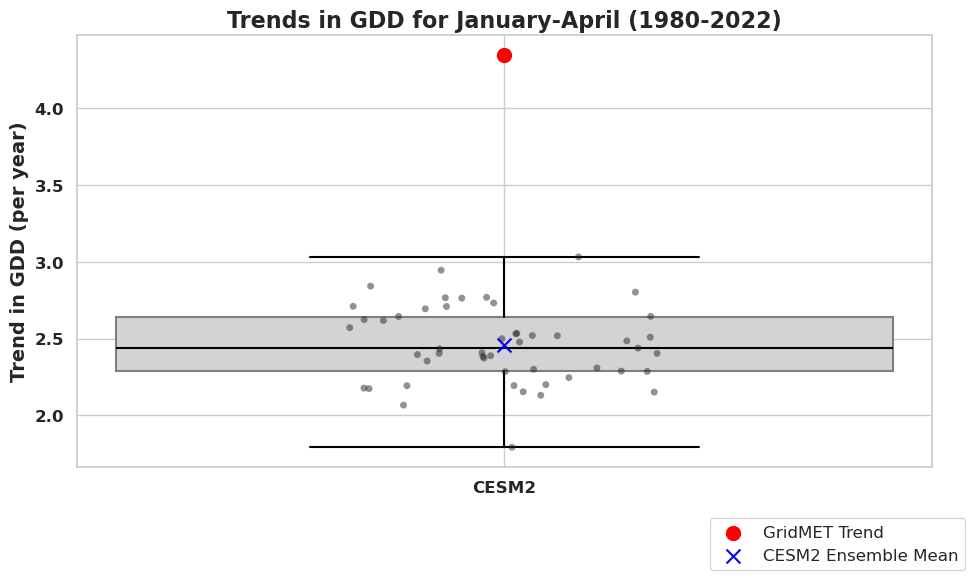

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/gddcesm2janapr/testtesttrend_gdd_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/gddcesm2janapr/testgridmet_trends_gddbb_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in GDD for January-April (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in GDD (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/GDD_Trends_Jan_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


# GDD GENERAL GROWTH

Saved the results to /home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_gg_analysis.nc


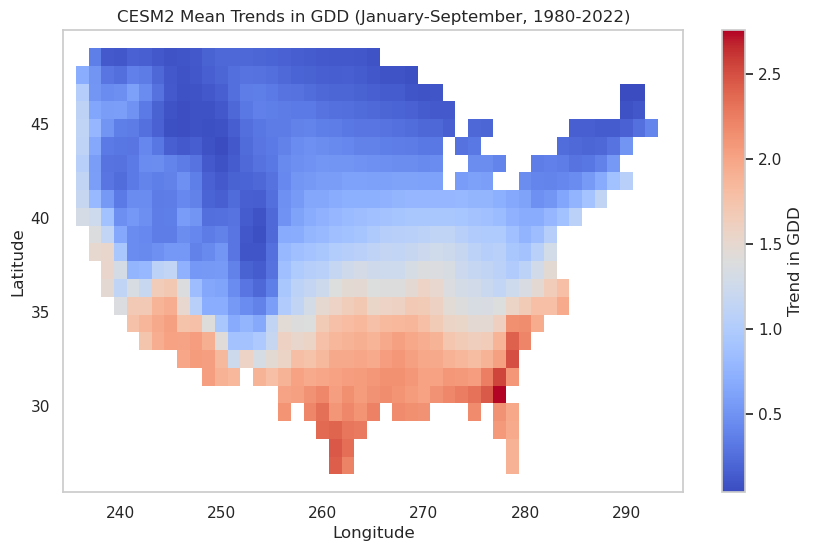

In [17]:
import xarray as xr
import numpy as np
import glob
import geopandas as gpd
import regionmask
from scipy.stats import linregress
import matplotlib.pyplot as plt

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.cumsum(dim="time")  # Accumulation of GDD over time

def filter_months(data, start_month=1, end_month=9):
    """Filter data to include only the months from January to April."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for each ensemble member."""
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_gdd:
        years = member_data['time.year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_ts_concatenated/*.nc'))
ensemble_gdd = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmin_celsius = ds['TREFHT'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmin_celsius_masked = tmin_celsius.where(mask == 0)
    
    # Filter months and calculate GDD
    filtered_data = filter_months(tmin_celsius_masked, start_month=1, end_month=4)
    annual_gdd = filtered_data.groupby('time.year').apply(calculate_gdd)
    
    # Ensure the normalized_areas array matches the shape of the annual_gdd
    normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

    # Resample normalized_areas to match the grid resolution of annual_gdd
    normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

    # Multiply by the normalized areas
    annual_gdd_weighted = annual_gdd * normalized_areas_da_resampled
    
    ensemble_gdd.append(annual_gdd_weighted)

ensemble_annual_gdd = xr.concat(ensemble_gdd, dim='ensemble')
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_annual_gdd)

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Save only the trends data to reduce file size
cesm2_gdd_ds = xr.Dataset({
    "ensemble_trends": ensemble_trends_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_gg_analysis.nc'
cesm2_gdd_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('CESM2 Mean Trends in GDD (January-September, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Saved the observed GDD trends to /home/shawn_preston/gddcdesm2jansept/testtestgridmet_trends_gddgg_analysis.nc


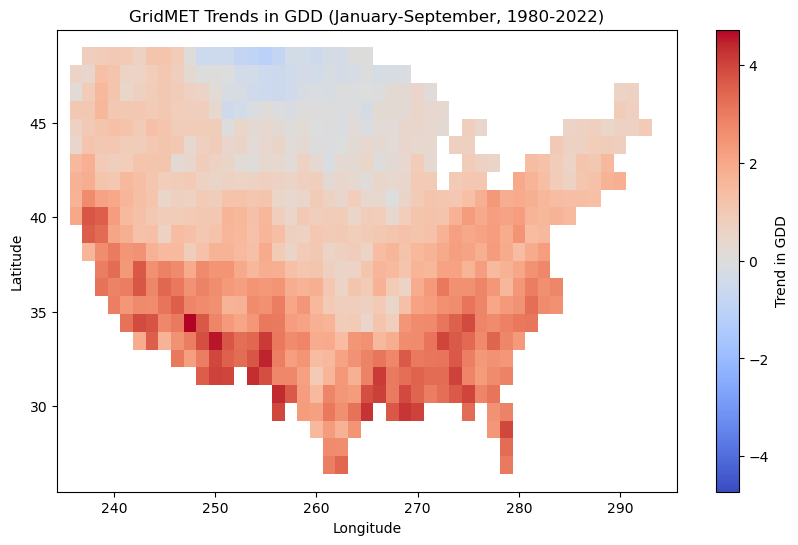

In [2]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def earth_radius(lat):
    """
    Calculate the radius of Earth assuming an oblate spheroid defined by WGS84.
    """
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    """
    Calculate the area of each grid cell in square meters.
    """
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.cumsum(dim="time")

def filter_months(data, start_month=1, end_month=9):
    """Filter data to include only the months from January to September."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for GDD."""
    years = annual_gdd['time.year'].values
    lat, lon = annual_gdd.lat.values, annual_gdd.lon.values
    slopes = np.full((len(lat), len(lon)), np.nan)
    p_values = np.full((len(lat), len(lon)), np.nan)

    for i in range(len(lat)):
        for j in range(len(lon)):
            y = annual_gdd.isel(lat=i, lon=j).values
            if not np.all(np.isnan(y)):
                slope, intercept, r_value, p_value, std_err = linregress(years, y)
                slopes[i, j] = slope
                p_values[i, j] = p_value

    trend_da = xr.DataArray(data=slopes, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})
    p_values_da = xr.DataArray(data=p_values, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})

    return trend_da, p_values_da

# Load observed temperature data
observed_data_path = '/home/shawn_preston/tmax/modified_regridded1979_2022_tavg_gridmet.nc'
observed_data = xr.open_dataset(observed_data_path)
observed_temp_data = observed_data['tavg']  # Ensure this is the correct variable name

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')
lon_1d = observed_data['lon'].values
lat_1d = observed_data['lat'].values

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to the temperature data
observed_temp_data_masked = observed_temp_data.where(mask == 0)

# Calculate GDD for observed data
filtered_data = filter_months(observed_temp_data_masked, start_month=1, end_month=9)
annual_gdd = filtered_data.groupby('time.year').apply(calculate_gdd)

# Ensure the normalized_areas array matches the shape of the annual_gdd
normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

# Resample normalized_areas to match the grid resolution of annual_gdd
normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

# Multiply by the normalized areas
annual_gdd_weighted = annual_gdd * normalized_areas_da_resampled

# Calculate trends for observed GDD data
observed_trends_da, observed_p_values_da = calculate_individual_trends(annual_gdd_weighted)

# Set values outside the mask to NaN
observed_trends_da = observed_trends_da.where(mask == 0)

# Compile into a Dataset
observed_trends_ds = xr.Dataset({
    "observed_trends": observed_trends_da,
    "observed_p_values": observed_p_values_da
}, coords={"lat": observed_data.lat, "lon": observed_data.lon})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcdesm2jansept/testtestgridmet_trends_gddgg_analysis.nc'
observed_trends_ds.to_netcdf(output_nc_file)

print(f"Saved the observed GDD trends to {output_nc_file}")

# Visualize the trends
plt.figure(figsize=(10, 6))
observed_trends_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('GridMET Trends in GDD (January-September, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


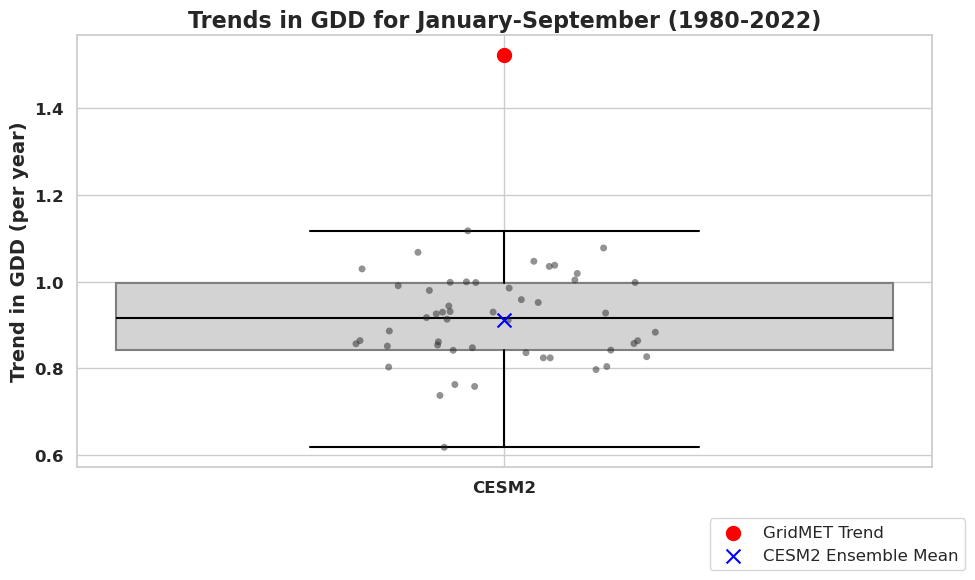

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_gg_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/gddcdesm2jansept/testtestgridmet_trends_gddgg_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in GDD for January-September (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in GDD (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/GDD_Trends_Jan_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


Saved the results to /home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_analysis.nc


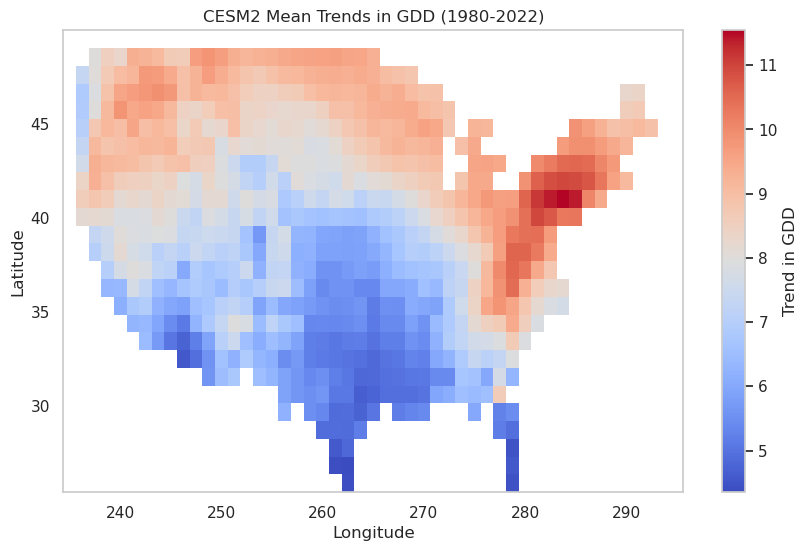

In [21]:
import xarray as xr
import numpy as np
import glob
import geopandas as gpd
import regionmask
from scipy.stats import linregress
import matplotlib.pyplot as plt

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.sum(dim="time")

def filter_months(data, start_month=1, end_month=9):
    """Filter data to include only the months from January to September."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for each ensemble member."""
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_gdd:
        years = member_data['year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_ts_concatenated/*.nc'))
ensemble_gdd = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmin_celsius = ds['TREFHT'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmin_celsius_masked = tmin_celsius.where(mask == 0)
    
    # Filter months and calculate GDD
    filtered_data = filter_months(tmin_celsius_masked, start_month=1, end_month=9)
    annual_gdd = filtered_data.groupby('time.year').apply(calculate_gdd)
    
    ensemble_gdd.append(annual_gdd)

ensemble_annual_gdd = xr.concat(ensemble_gdd, dim='ensemble')
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_annual_gdd)

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Compile into a Dataset
cesm2_gdd_ds = xr.Dataset({
    "ensemble_gdd_yearly": ensemble_annual_gdd,
    "ensemble_trends": ensemble_trends_da,
    "ensemble_p_values": ensemble_p_values_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_analysis.nc'
cesm2_gdd_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('CESM2 Mean Trends in GDD (1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Saved the observed GDD trends to /home/shawn_preston/gddcdesm2jansept/testgridmet_trends_gddgg_analysis.nc


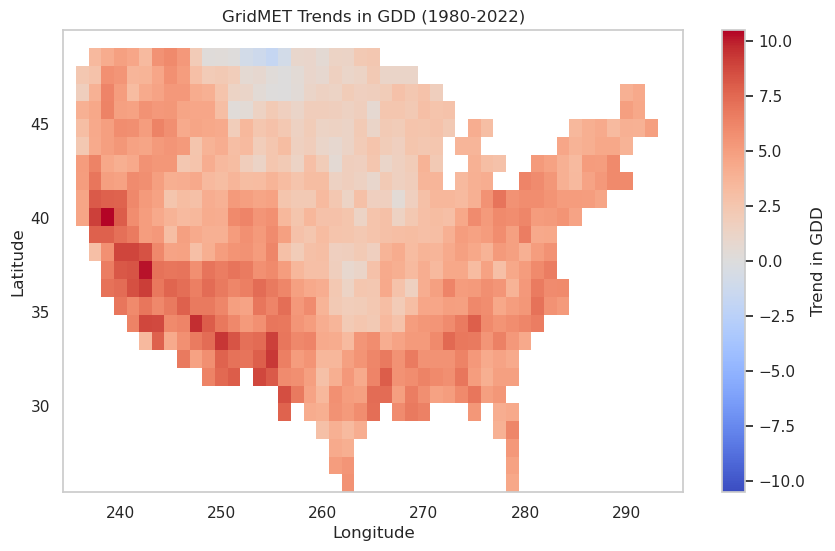

In [18]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

def calculate_gdd(data, baseline=6, max_threshold=28):
    """Calculate Growing Degree Days (GDD) with specified baseline and max threshold."""
    gdd = xr.apply_ufunc(
        lambda x: np.where(x > baseline, np.minimum(x, max_threshold) - baseline, 0),
        data,
        dask="allowed"
    )
    return gdd.sum(dim="time")

def filter_months(data, start_month=1, end_month=9):
    """Filter data to include only the months from January to September."""
    return data.sel(time=data.time.dt.month.isin(range(start_month, end_month + 1)))

def calculate_individual_trends(annual_gdd):
    """Calculate linear trends for GDD."""
    years = annual_gdd['year'].values
    lat, lon = annual_gdd.lat.values, annual_gdd.lon.values
    slopes = np.full((len(lat), len(lon)), np.nan)
    p_values = np.full((len(lat), len(lon)), np.nan)

    for i in range(len(lat)):
        for j in range(len(lon)):
            y = annual_gdd.isel(lat=i, lon=j).values
            if not np.all(np.isnan(y)):
                slope, intercept, r_value, p_value, std_err = linregress(years, y)
                slopes[i, j] = slope
                p_values[i, j] = p_value

    trend_da = xr.DataArray(data=slopes, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})
    p_values_da = xr.DataArray(data=p_values, dims=["lat", "lon"], coords={"lat": lat, "lon": lon})

    return trend_da, p_values_da

# Load observed temperature data
observed_data_path = '/home/shawn_preston/tmax/modified_regridded1979_2022_tavg_gridmet.nc'
observed_data = xr.open_dataset(observed_data_path)
observed_temp_data = observed_data['tavg']  # Ensure this is the correct variable name

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')
lon_1d = observed_data['lon'].values
lat_1d = observed_data['lat'].values

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to the temperature data
observed_temp_data_masked = observed_temp_data.where(mask == 0)

# Calculate GDD for observed data
observed_gdd = filter_months_and_calculate_gdd(observed_temp_data_masked)

# Calculate trends for observed GDD data
observed_trends_da, observed_p_values_da = calculate_individual_trends(observed_gdd)

# Set values outside the mask to NaN
observed_trends_da = observed_trends_da.where(mask == 0)

# Compile into a Dataset
observed_trends_ds = xr.Dataset({
    "observed_gdd_yearly": observed_gdd,
    "observed_trends": observed_trends_da,
    "observed_p_values": observed_p_values_da
}, coords={"lat": observed_data.lat, "lon": observed_data.lon})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/gddcdesm2jansept/testgridmet_trends_gddgg_analysis.nc'
observed_trends_ds.to_netcdf(output_nc_file)

print(f"Saved the observed GDD trends to {output_nc_file}")

# Visualize the trends
plt.figure(figsize=(10, 6))
observed_trends_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in GDD'})
plt.title('GridMET Trends in GDD (1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


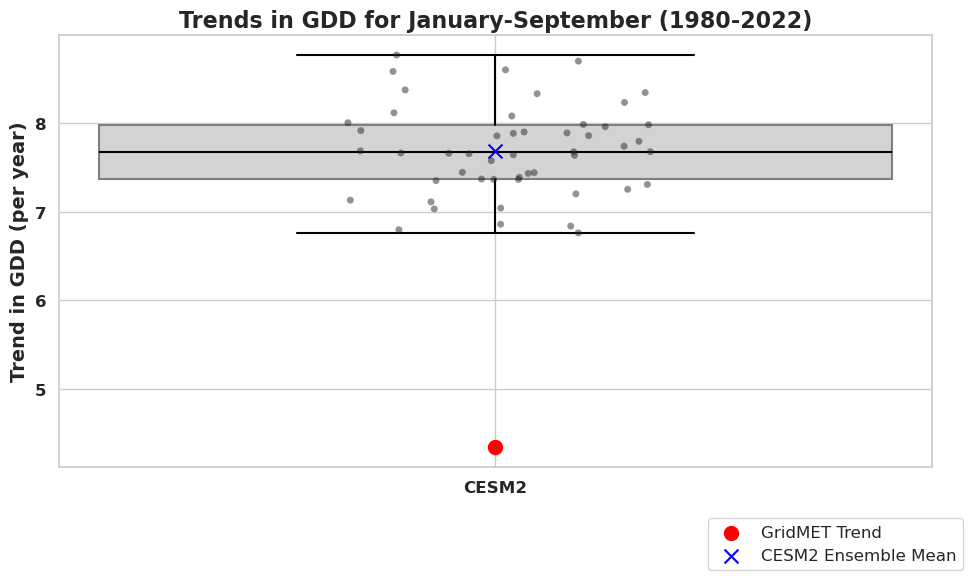

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/gddcdesm2jansept/testtesttrend_gdd_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/gddcdesm2jansept/testgridmet_trends_gddgg_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in GDD for January-September (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in GDD (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/GDD_Trends_Jan_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


# TMAX

Saved the results to /home/shawn_preston/tmax34ensemble/testtesttrend_days_above_threshold_analysis.nc


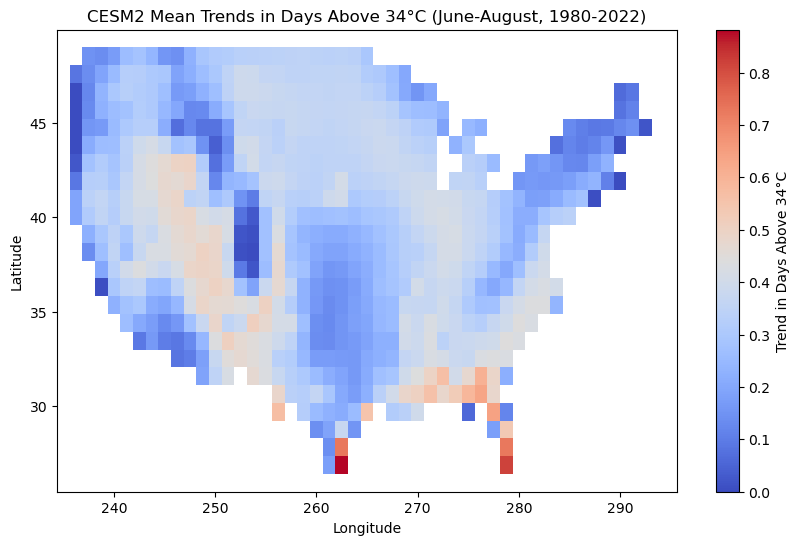

In [5]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import glob
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt

def filter_months_and_calculate_days_above(ds, threshold=34, start_month=6, end_month=8):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

def calculate_individual_trends(annual_days_above):
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_days_above:
        lat, lon = member_data.lat.values, member_data.lon.values
        years = member_data.year.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.isel(lat=i, lon=j).values
                if len(y) == len(years):  # Ensure y and years have the same length
                    if not np.all(np.isnan(y)):
                        slope, intercept, r_value, p_value, std_err = linregress(years, y)
                        slopes[i, j] = slope
                        p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.DataArray(data=ensemble_trends, dims=["ensemble", "lat", "lon"], coords={"lat": lat, "lon": lon, "ensemble": np.arange(len(annual_days_above))})
    ensemble_p_values_da = xr.DataArray(data=ensemble_p_values, dims=["ensemble", "lat", "lon"], coords={"lat": lat, "lon": lon, "ensemble": np.arange(len(annual_days_above))})

    return ensemble_trends_da, ensemble_p_values_da

def earth_radius(lat):
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_tmax_concatenated/*.nc'))
ensemble_days_above = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmax_celsius = ds['TREFHTMX'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmax_celsius_masked = tmax_celsius.where(mask == 0)
    
    # Calculate days above 34°C
    annual_days_above = filter_months_and_calculate_days_above(tmax_celsius_masked)
    
    # Ensure the normalized_areas array matches the shape of the annual_days_above
    normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

    # Resample normalized_areas to match the grid resolution of annual_days_above
    normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

    # Multiply by the normalized areas
    annual_days_above_weighted = annual_days_above * normalized_areas_da_resampled
    
    ensemble_days_above.append(annual_days_above_weighted)

ensemble_annual_days_above = xr.concat(ensemble_days_above, dim='ensemble')

# Now calculate trends directly from the concatenated dataset
ensemble_trends_da, ensemble_p_values_da = calculate_individual_trends(ensemble_annual_days_above)

mean_trend = ensemble_trends_da.mean(dim='ensemble')
mean_p_values = ensemble_p_values_da.mean(dim='ensemble')

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Save only the trends data to reduce file size
cesm2_ds = xr.Dataset({
    "ensemble_trends": ensemble_trends_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/tmax34ensemble/testtesttrend_days_above_threshold_analysis.nc'
cesm2_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in Days Above 34°C'})
plt.title('CESM2 Mean Trends in Days Above 34°C (June-August, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Saved the results to /home/shawn_preston/tmax34ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc


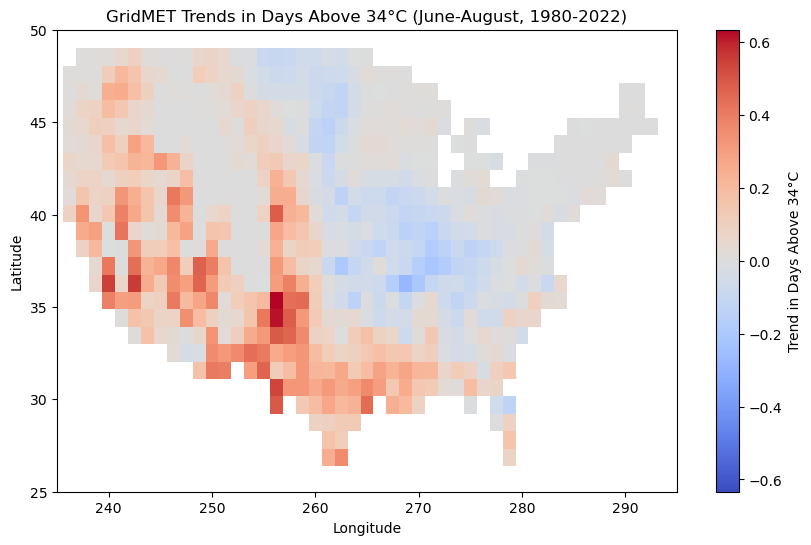

In [9]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt

def filter_months_and_calculate_days_above(ds, threshold=34, start_month=6, end_month=8):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

def earth_radius(lat):
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

# Load the GridMET dataset
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax/modified_regridded1979_2022_tmax_gridmet.nc').sel(time=slice('1980-01-01', '2022-12-31'))

# Check the units of the dataset and convert if necessary
if gridmet_ds['tmax'].max() > 200:  # Assuming the data is in Kelvin if max is over 200
    tmax_celsius_gridmet = gridmet_ds['tmax'] - 273.15
else:
    tmax_celsius_gridmet = gridmet_ds['tmax']

# Extract the longitude and latitude arrays from GridMET
lon_1d = gridmet_ds['lon'].values
lat_1d = gridmet_ds['lat'].values

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to GridMET data
tmax_celsius_gridmet_masked = tmax_celsius_gridmet.where(mask == 0)

# Calculate days above 34°C
annual_days_above_gridmet = filter_months_and_calculate_days_above(tmax_celsius_gridmet_masked)

# Ensure the normalized_areas array matches the shape of the annual_days_above
normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

# Resample normalized_areas to match the grid resolution of annual_days_above
normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

# Multiply by the normalized areas
annual_days_above_gridmet_weighted = annual_days_above_gridmet * normalized_areas_da_resampled

# Calculate the trend for GridMET
years_gridmet = annual_days_above_gridmet_weighted['year'].values
lat_gridmet, lon_gridmet = annual_days_above_gridmet_weighted.lat.values, annual_days_above_gridmet_weighted.lon.values
slopes_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)
p_values_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)

for i in range(len(lat_gridmet)):
    for j in range(len(lon_gridmet)):
        y = annual_days_above_gridmet_weighted.sel(lat=lat_gridmet[i], lon=lon_gridmet[j]).values
        if not np.all(np.isnan(y)):
            slope, intercept, r_value, p_value, std_err = linregress(years_gridmet, y)
            slopes_gridmet[i, j] = slope
            p_values_gridmet[i, j] = p_value

gridmet_trend_da = xr.DataArray(data=slopes_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})
gridmet_p_values_da = xr.DataArray(data=p_values_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})

# Mask the trends dataset to ensure values outside the shapefile are NaN
gridmet_trend_da = gridmet_trend_da.where(mask == 0)

# Save the GridMET trends to a NetCDF file
gridmet_ds = xr.Dataset({
    "observed_trends": gridmet_trend_da,
    "observed_p_values": gridmet_p_values_da
}, coords={"lat": lat_gridmet, "lon": lon_gridmet})

output_nc_file_gridmet = '/home/shawn_preston/tmax34ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'
gridmet_ds.to_netcdf(output_nc_file_gridmet)

print(f"Saved the results to {output_nc_file_gridmet}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
gridmet_trend_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in Days Above 34°C'})
plt.title('GridMET Trends in Days Above 34°C (June-August, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(235, 295)  # Set limits for longitude to focus on the US
plt.ylim(25, 50)    # Set limits for latitude to focus on the US
plt.show()


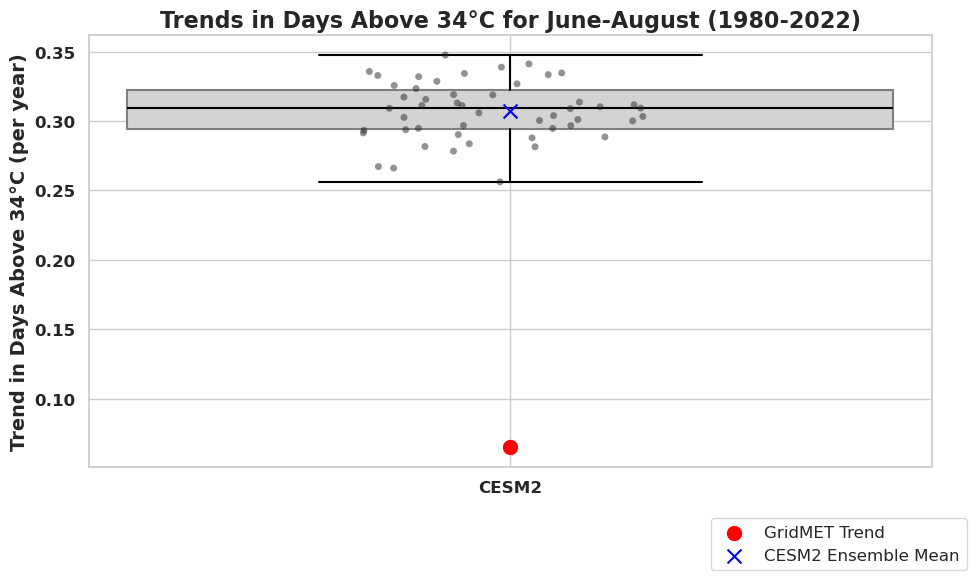

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/tmax34ensemble/testtesttrend_days_above_threshold_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax34ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in Days Above 34°C for June-August (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in Days Above 34°C (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Days_Above_15C_Trends_Aug_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


In [1]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import glob
import geopandas as gpd
import regionmask

def filter_months_and_calculate_days_above(ds, threshold=34, start_month=6, end_month=8):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

def calculate_individual_trends(annual_days_above):
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_days_above:
        years = member_data['year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_tmax_concatenated/*.nc'))
ensemble_days_above = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmin_celsius = ds['TREFHTMX'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmin_celsius_masked = tmin_celsius.where(mask == 0)
    
    # Calculate days above 15°C
    annual_days_above = filter_months_and_calculate_days_above(tmin_celsius_masked)
    ensemble_days_above.append(annual_days_above)

ensemble_annual_days_above = xr.concat(ensemble_days_above, dim='ensemble')
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_annual_days_above)

# Compile into a Dataset
cesm2_ds = xr.Dataset({
    "ensemble_days_above_yearly": ensemble_annual_days_above,
    "ensemble_trends": ensemble_trends_da,
    "ensemble_p_values": ensemble_p_values_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/tmax34ensemble/testtrend_days_above_threshold_analysis.nc'
cesm2_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")


Saved the results to /home/shawn_preston/tmax34ensemble/testtrend_days_above_threshold_analysis.nc


In [4]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask

def filter_months_and_calculate_days_above(ds, threshold=34, start_month=6, end_month=8):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

# Load the GridMET dataset
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax/modified_regridded1979_2022_tmax_gridmet.nc').sel(time=slice('1980-01-01', '2022-12-31'))

# Check the units of the dataset and convert if necessary
if gridmet_ds['tmax'].max() > 200:  # Assuming the data is in Kelvin if max is over 200
    tmin_celsius_gridmet = gridmet_ds['tmax'] - 273.15
else:
    tmin_celsius_gridmet = gridmet_ds['tmax']

# Extract the longitude and latitude arrays from GridMET
lon_1d = gridmet_ds['lon'].values
lat_1d = gridmet_ds['lat'].values

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to GridMET data
tmin_celsius_gridmet_masked = tmin_celsius_gridmet.where(mask == 0)

# Calculate days above 15°C
annual_days_above_gridmet = filter_months_and_calculate_days_above(tmin_celsius_gridmet_masked)

# Calculate the trend for GridMET
years_gridmet = annual_days_above_gridmet['year'].values
lat_gridmet, lon_gridmet = annual_days_above_gridmet.lat.values, annual_days_above_gridmet.lon.values
slopes_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)
p_values_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)

for i in range(len(lat_gridmet)):
    for j in range(len(lon_gridmet)):
        y = annual_days_above_gridmet.sel(lat=lat_gridmet[i], lon=lon_gridmet[j]).values
        if not np.all(np.isnan(y)):
            slope, intercept, r_value, p_value, std_err = linregress(years_gridmet, y)
            slopes_gridmet[i, j] = slope
            p_values_gridmet[i, j] = p_value

gridmet_trend_da = xr.DataArray(data=slopes_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})
gridmet_p_values_da = xr.DataArray(data=p_values_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})

# Save the GridMET trends to a NetCDF file
gridmet_ds = xr.Dataset({
    "observed_trends": gridmet_trend_da,
    "observed_p_values": gridmet_p_values_da
}, coords={"lat": lat_gridmet, "lon": lon_gridmet})

output_nc_file_gridmet = '/home/shawn_preston/tmax34ensemble/testgridmet_trends_days_above_threshold_analysis.nc'
gridmet_ds.to_netcdf(output_nc_file_gridmet)

print(f"Saved the results to {output_nc_file_gridmet}")


Saved the results to /home/shawn_preston/tmax34ensemble/testgridmet_trends_days_above_threshold_analysis.nc


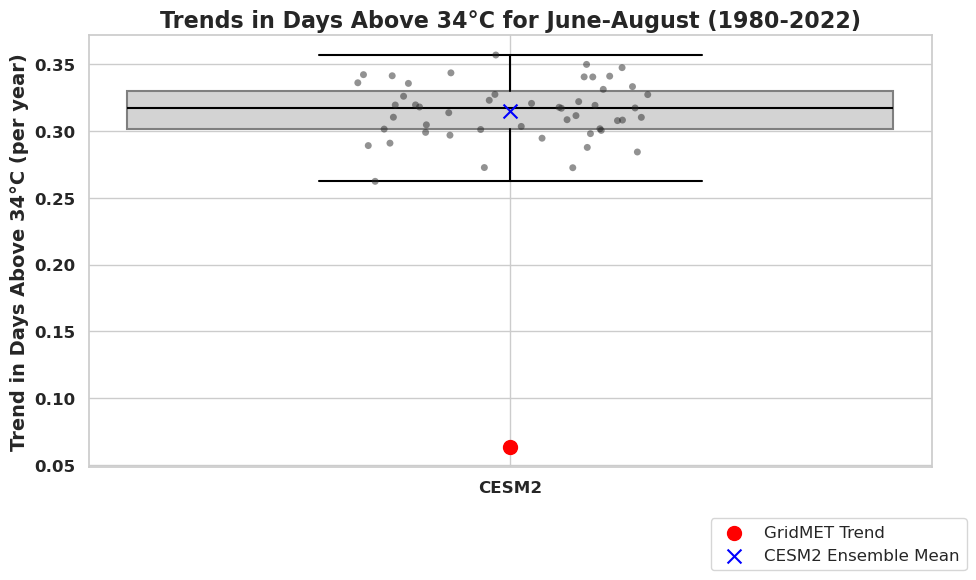

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/tmax34ensemble/testtrend_days_above_threshold_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax34ensemble/testgridmet_trends_days_above_threshold_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in Days Above 34°C for June-August (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in Days Above 34°C (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Days_Above_15C_Trends_Aug_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


# TMIN

Saved the results to /home/shawn_preston/tmin15ensemble/testtesttrend_days_above_threshold_analysis.nc


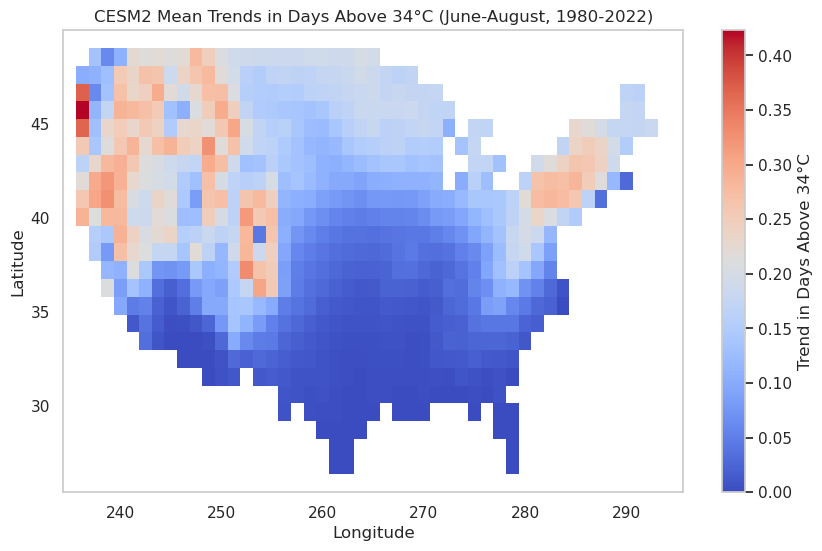

In [11]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import glob
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt

def filter_months_and_calculate_days_above(ds, threshold=15, start_month=8, end_month=9):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

def calculate_individual_trends(annual_days_above):
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_days_above:
        lat, lon = member_data.lat.values, member_data.lon.values
        years = member_data.year.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.isel(lat=i, lon=j).values
                if len(y) == len(years):  # Ensure y and years have the same length
                    if not np.all(np.isnan(y)):
                        slope, intercept, r_value, p_value, std_err = linregress(years, y)
                        slopes[i, j] = slope
                        p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.DataArray(data=ensemble_trends, dims=["ensemble", "lat", "lon"], coords={"lat": lat, "lon": lon, "ensemble": np.arange(len(annual_days_above))})
    ensemble_p_values_da = xr.DataArray(data=ensemble_p_values, dims=["ensemble", "lat", "lon"], coords={"lat": lat, "lon": lon, "ensemble": np.arange(len(annual_days_above))})

    return ensemble_trends_da, ensemble_p_values_da

def earth_radius(lat):
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_tmin_concatenated/*.nc'))
ensemble_days_above = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmax_celsius = ds['TREFHTMN'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmax_celsius_masked = tmax_celsius.where(mask == 0)
    
    # Calculate days above 34°C
    annual_days_above = filter_months_and_calculate_days_above(tmax_celsius_masked)
    
    # Ensure the normalized_areas array matches the shape of the annual_days_above
    normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

    # Resample normalized_areas to match the grid resolution of annual_days_above
    normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

    # Multiply by the normalized areas
    annual_days_above_weighted = annual_days_above * normalized_areas_da_resampled
    
    ensemble_days_above.append(annual_days_above_weighted)

ensemble_annual_days_above = xr.concat(ensemble_days_above, dim='ensemble')

# Now calculate trends directly from the concatenated dataset
ensemble_trends_da, ensemble_p_values_da = calculate_individual_trends(ensemble_annual_days_above)

mean_trend = ensemble_trends_da.mean(dim='ensemble')
mean_p_values = ensemble_p_values_da.mean(dim='ensemble')

# Mask the trends dataset to ensure values outside the shapefile are NaN
ensemble_trends_da = ensemble_trends_da.where(mask == 0)
mean_trend = mean_trend.where(mask == 0)

# Save only the trends data to reduce file size
cesm2_ds = xr.Dataset({
    "ensemble_trends": ensemble_trends_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/tmin15ensemble/testtesttrend_days_above_threshold_analysis.nc'
cesm2_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
mean_trend.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in Days Above 34°C'})
plt.title('CESM2 Mean Trends in Days Above 34°C (June-August, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Saved the results to /home/shawn_preston/tmin15ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc


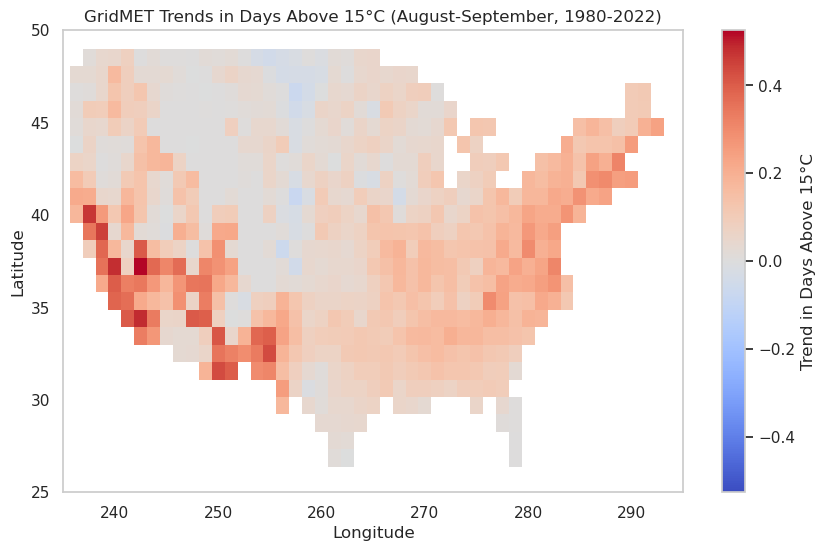

In [12]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt

def filter_months_and_calculate_days_above(ds, threshold=15, start_month=8, end_month=9):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

def earth_radius(lat):
    a = 6378137  # semi-major axis in meters
    b = 6356752.3142  # semi-minor axis in meters
    e2 = 1 - (b**2 / a**2)  # square of eccentricity
    
    lat_rad = np.deg2rad(lat)  # convert from degrees to radians
    lat_gc = np.arctan((1 - e2) * np.tan(lat_rad))  # convert from geodetic to geocentric
    
    r = (a * (1 - e2)**0.5) / (1 - (e2 * np.cos(lat_gc)**2))**0.5
    return r

def area_grid(lat, lon):
    lon, lat = np.meshgrid(lon, lat)  
    R = earth_radius(lat)
    
    dlat = np.deg2rad(np.gradient(lat, axis=0))
    dlon = np.deg2rad(np.gradient(lon, axis=1))
    
    dy = dlat * R
    dx = dlon * R * np.cos(np.deg2rad(lat))
    
    area = dy * dx  # Area calculation
    return area

# Unique latitudes and longitudes provided
latitudes = np.array([25.91623037, 26.85863874, 27.80104712, 28.7434555, 29.68586387, 
                      30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 
                      35.34031414, 36.28272251, 37.22513089, 38.16753927, 39.10994764, 
                      40.05235602, 40.9947644, 41.93717277, 42.87958115, 43.82198953, 
                      44.76439791, 45.70680628, 46.64921466, 47.59162304, 48.53403141, 
                      49.47643979])
longitudes = np.array([235., 236.25, 237.5, 238.75, 240., 241.25, 242.5, 243.75, 245., 246.25,
                       247.5, 248.75, 250., 251.25, 252.5, 253.75, 255., 256.25, 257.5, 258.75,
                       260., 261.25, 262.5, 263.75, 265., 266.25, 267.5, 268.75, 270., 271.25,
                       272.5, 273.75, 275., 276.25, 277.5, 278.75, 280., 281.25, 282.5, 283.75,
                       285., 286.25, 287.5, 288.75, 290., 291.25, 292.5, 293.75, 295.])

# Calculate the area of each grid cell
area = area_grid(latitudes, longitudes)
total_area = np.sum(area)

# Compute the normalization factor for each cell relative to the average area
average_area_per_cell = total_area / area.size
normalized_areas = area / average_area_per_cell

# Load the GridMET dataset
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax/modified_regridded1979_2022_tmin_gridmet.nc').sel(time=slice('1980-01-01', '2022-12-31'))

# Check the units of the dataset and convert if necessary
if gridmet_ds['tmin'].max() > 200:  # Assuming the data is in Kelvin if max is over 200
    tmax_celsius_gridmet = gridmet_ds['tmin'] - 273.15
else:
    tmax_celsius_gridmet = gridmet_ds['tmin']

# Extract the longitude and latitude arrays from GridMET
lon_1d = gridmet_ds['lon'].values
lat_1d = gridmet_ds['lat'].values

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to GridMET data
tmax_celsius_gridmet_masked = tmax_celsius_gridmet.where(mask == 0)

# Calculate days above 34°C
annual_days_above_gridmet = filter_months_and_calculate_days_above(tmax_celsius_gridmet_masked)

# Ensure the normalized_areas array matches the shape of the annual_days_above
normalized_areas_da = xr.DataArray(normalized_areas, dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

# Resample normalized_areas to match the grid resolution of annual_days_above
normalized_areas_da_resampled = normalized_areas_da.interp(lat=lat_1d, lon=lon_1d)

# Multiply by the normalized areas
annual_days_above_gridmet_weighted = annual_days_above_gridmet * normalized_areas_da_resampled

# Calculate the trend for GridMET
years_gridmet = annual_days_above_gridmet_weighted['year'].values
lat_gridmet, lon_gridmet = annual_days_above_gridmet_weighted.lat.values, annual_days_above_gridmet_weighted.lon.values
slopes_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)
p_values_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)

for i in range(len(lat_gridmet)):
    for j in range(len(lon_gridmet)):
        y = annual_days_above_gridmet_weighted.sel(lat=lat_gridmet[i], lon=lon_gridmet[j]).values
        if not np.all(np.isnan(y)):
            slope, intercept, r_value, p_value, std_err = linregress(years_gridmet, y)
            slopes_gridmet[i, j] = slope
            p_values_gridmet[i, j] = p_value

gridmet_trend_da = xr.DataArray(data=slopes_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})
gridmet_p_values_da = xr.DataArray(data=p_values_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})

# Mask the trends dataset to ensure values outside the shapefile are NaN
gridmet_trend_da = gridmet_trend_da.where(mask == 0)

# Save the GridMET trends to a NetCDF file
gridmet_ds = xr.Dataset({
    "observed_trends": gridmet_trend_da,
    "observed_p_values": gridmet_p_values_da
}, coords={"lat": lat_gridmet, "lon": lon_gridmet})

output_nc_file_gridmet = '/home/shawn_preston/tmin15ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc'
gridmet_ds.to_netcdf(output_nc_file_gridmet)

print(f"Saved the results to {output_nc_file_gridmet}")

# Visualize the mean trend
plt.figure(figsize=(10, 6))
gridmet_trend_da.plot(cmap="coolwarm", cbar_kwargs={'label': 'Trend in Days Above 15°C'})
plt.title('GridMET Trends in Days Above 15°C (August-September, 1980-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(235, 295)  # Set limits for longitude to focus on the US
plt.ylim(25, 50)    # Set limits for latitude to focus on the US
plt.show()


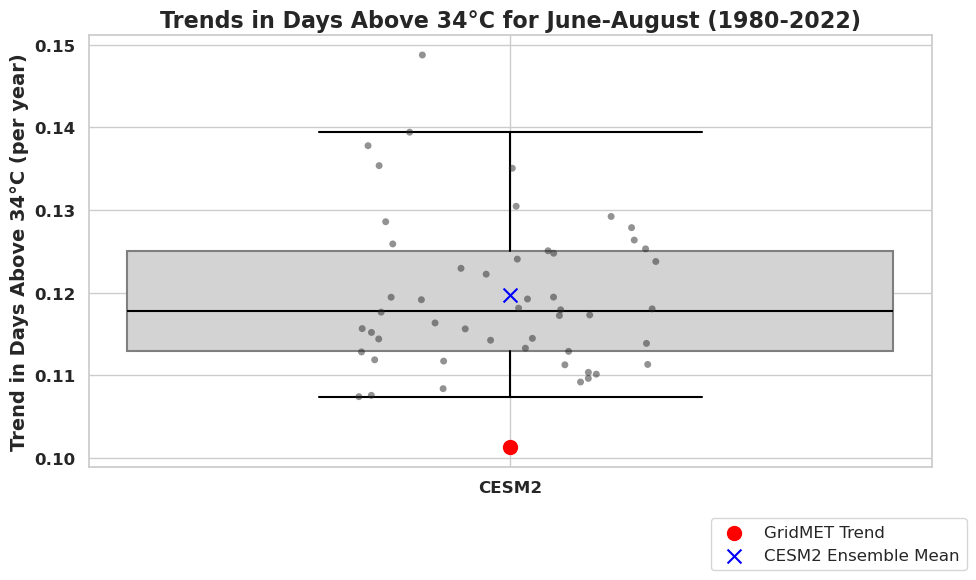

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/tmin15ensemble/testtesttrend_days_above_threshold_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmin15ensemble/testtestgridmet_trends_days_above_threshold_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in Days Above 34°C for June-August (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in Days Above 34°C (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Days_Above_15C_Trends_Aug_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import glob
import geopandas as gpd
import regionmask

def filter_months_and_calculate_days_above(ds, threshold=15, start_month=8, end_month=9):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

def calculate_individual_trends(annual_days_above):
    ensemble_trends = []
    ensemble_p_values = []

    for member_data in annual_days_above:
        years = member_data['year'].values
        lat, lon = member_data.lat.values, member_data.lon.values
        slopes = np.full((len(lat), len(lon)), np.nan)
        p_values = np.full((len(lat), len(lon)), np.nan)

        for i in range(len(lat)):
            for j in range(len(lon)):
                y = member_data.sel(lat=lat[i], lon=lon[j]).values
                if not np.all(np.isnan(y)):
                    slope, intercept, r_value, p_value, std_err = linregress(years, y)
                    slopes[i, j] = slope
                    p_values[i, j] = p_value

        ensemble_trends.append(slopes)
        ensemble_p_values.append(p_values)

    ensemble_trends_da = xr.concat([xr.DataArray(data=trends, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for trends in ensemble_trends], dim='ensemble')
    ensemble_p_values_da = xr.concat([xr.DataArray(data=pvals, dims=["lat", "lon"], coords={"lat": lat, "lon": lon}) for pvals in ensemble_p_values], dim='ensemble')
    
    mean_trend = ensemble_trends_da.mean(dim="ensemble")
    mean_p_values = ensemble_p_values_da.mean(dim="ensemble")

    return ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values

# Path to CESM2 NetCDF files
nc_files = sorted(glob.glob('/data/project/agaid/singh_cesm_ts/cesm_tmin_concatenated/*.nc'))
ensemble_days_above = []

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

for file_path in nc_files:
    ds = xr.open_dataset(file_path, use_cftime=True).sel(lon=slice(235, 295), lat=slice(25, 50))
    tmin_celsius = ds['TREFHTMN'] - 273.15
    
    # Extract the longitude and latitude arrays from CESM2
    lon_1d = ds['lon'].values
    lat_1d = ds['lat'].values
    
    # Create the mask using the shapefile
    mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)
    
    # Apply the mask to CESM2 data
    tmin_celsius_masked = tmin_celsius.where(mask == 0)
    
    # Calculate days above 15°C
    annual_days_above = filter_months_and_calculate_days_above(tmin_celsius_masked)
    ensemble_days_above.append(annual_days_above)

ensemble_annual_days_above = xr.concat(ensemble_days_above, dim='ensemble')
ensemble_trends_da, ensemble_p_values_da, mean_trend, mean_p_values = calculate_individual_trends(ensemble_annual_days_above)

# Compile into a Dataset
cesm2_ds = xr.Dataset({
    "ensemble_days_above_yearly": ensemble_annual_days_above,
    "ensemble_trends": ensemble_trends_da,
    "ensemble_p_values": ensemble_p_values_da,
    "mean_trend": mean_trend,
    "mean_p_values": mean_p_values
}, coords={"lat": ds.lat, "lon": ds.lon, "ensemble": np.arange(len(nc_files))})

# Save to a NetCDF file
output_nc_file = '/home/shawn_preston/tmin15ensemble/testtrend_days_above_threshold_analysis.nc'
cesm2_ds.to_netcdf(output_nc_file)

print(f"Saved the results to {output_nc_file}")


In [ ]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
import regionmask

def filter_months_and_calculate_days_above(ds, threshold=15, start_month=8, end_month=9):
    filtered_data = ds.sel(time=ds['time.month'].isin(range(start_month, end_month + 1)))
    days_above = filtered_data > threshold
    yearly_days_above = days_above.groupby('time.year').sum(dim="time")
    return yearly_days_above

# Load the GridMET dataset
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmax/modified_regridded1979_2022_tmin_gridmet.nc').sel(time=slice('1980-01-01', '2022-12-31'))

# Check the units of the dataset and convert if necessary
if gridmet_ds['tmin'].max() > 200:  # Assuming the data is in Kelvin if max is over 200
    tmin_celsius_gridmet = gridmet_ds['tmin'] - 273.15
else:
    tmin_celsius_gridmet = gridmet_ds['tmin']

# Extract the longitude and latitude arrays from GridMET
lon_1d = gridmet_ds['lon'].values
lat_1d = gridmet_ds['lat'].values

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Create the mask using the shapefile
mask = regionmask.mask_geopandas(gdf, lon_1d, lat_1d)

# Apply the mask to GridMET data
tmin_celsius_gridmet_masked = tmin_celsius_gridmet.where(mask == 0)

# Calculate days above 15°C
annual_days_above_gridmet = filter_months_and_calculate_days_above(tmin_celsius_gridmet_masked)

# Calculate the trend for GridMET
years_gridmet = annual_days_above_gridmet['year'].values
lat_gridmet, lon_gridmet = annual_days_above_gridmet.lat.values, annual_days_above_gridmet.lon.values
slopes_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)
p_values_gridmet = np.full((len(lat_gridmet), len(lon_gridmet)), np.nan)

for i in range(len(lat_gridmet)):
    for j in range(len(lon_gridmet)):
        y = annual_days_above_gridmet.sel(lat=lat_gridmet[i], lon=lon_gridmet[j]).values
        if not np.all(np.isnan(y)):
            slope, intercept, r_value, p_value, std_err = linregress(years_gridmet, y)
            slopes_gridmet[i, j] = slope
            p_values_gridmet[i, j] = p_value

gridmet_trend_da = xr.DataArray(data=slopes_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})
gridmet_p_values_da = xr.DataArray(data=p_values_gridmet, dims=["lat", "lon"], coords={"lat": lat_gridmet, "lon": lon_gridmet})

# Save the GridMET trends to a NetCDF file
gridmet_ds = xr.Dataset({
    "observed_trends": gridmet_trend_da,
    "observed_p_values": gridmet_p_values_da
}, coords={"lat": lat_gridmet, "lon": lon_gridmet})

output_nc_file_gridmet = '/home/shawn_preston/tmin15ensemble/testgridmet_trends_days_above_threshold_analysis.nc'
gridmet_ds.to_netcdf(output_nc_file_gridmet)

print(f"Saved the results to {output_nc_file_gridmet}")


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import regionmask
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load CESM2 trends
cesm2_ds = xr.open_dataset('/home/shawn_preston/tmin15ensemble/testtrend_days_above_threshold_analysis.nc')

# Load GridMET trends
gridmet_ds = xr.open_dataset('/home/shawn_preston/tmin15ensemble/testgridmet_trends_days_above_threshold_analysis.nc')

# Load the shapefile
gdf = gpd.read_file('/home/shawn_preston/shapefile_nation/combined_conus.shp')

# Apply the shapefile mask to CESM2 and GridMET
lon_cesm2 = cesm2_ds.lon.values
lat_cesm2 = cesm2_ds.lat.values
mask_cesm2 = regionmask.mask_geopandas(gdf, lon_cesm2, lat_cesm2)
ensemble_trends_cesm2_masked = cesm2_ds['ensemble_trends'].where(mask_cesm2 == 0)

lon_gridmet = gridmet_ds.lon.values
lat_gridmet = gridmet_ds.lat.values
mask_gridmet = regionmask.mask_geopandas(gdf, lon_gridmet, lat_gridmet)
gridmet_trend_masked = gridmet_ds['observed_trends'].where(mask_gridmet == 0)

# Extract trends for each ensemble member
ensemble_trends_cesm2_values = ensemble_trends_cesm2_masked.mean(dim=['lat', 'lon']).values.flatten()
gridmet_trend_value = gridmet_trend_masked.mean().item()
ensemble_mean = ensemble_trends_cesm2_values.mean()

# Prepare data for boxplot
trend_data = {
    'CESM2 Ensemble': ensemble_trends_cesm2_values
}

trend_df = pd.DataFrame(trend_data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the boxplot
boxplot = sns.boxplot(data=trend_df, color='lightgrey', width=0.5, showfliers=False)
sns.stripplot(data=trend_df, color='grey', alpha=0.5, size=5)

# Plot the GridMET marker
plt.scatter(0, gridmet_trend_value, color='red', zorder=5, label='GridMET Trend', marker='o', s=100)
plt.scatter(0, ensemble_mean, color='blue', zorder=5, label='CESM2 Ensemble Mean', marker='x', s=100)

# Customize the plot
plt.title('Trends in Days Above 15°C for August-September (1980-2022)', fontsize=16, weight='bold')
plt.ylabel('Trend in Days Above 15°C (per year)', fontsize=14, weight='bold')
plt.legend(fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.89, -0.1))
plt.grid(True)

# Customize tick parameters
plt.xticks(ticks=[0], labels=['CESM2'], fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Improve boxplot aesthetics
for artist in boxplot.artists:
    artist.set_edgecolor('black')
    artist.set_facecolor('lightgrey')
for line in boxplot.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('/home/shawn_preston/CESM2PAPERFIGURES/Days_Above_15C_Trends_Aug_Sep_Boxplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()
